# Home Credit Indonesia Score Card Model

Created by: Nicholas Sky Salvatio - February 2023

## Problem Statement:

Based on a some time period loan applications dataset, Home Credit Indonesia discover that there are numerous customers who were struggling to get loans due to insufficient or non-existent credit histories. Therefore, Home Credit Indonesia strives to broaden financial inclusion for the unbanked population by providing a safe and positive borrowing experience. Home Credit Indonesia would like to develop machine learning model to help the company determine whether the proposed loan is accepted or rejected by identifying the possible significant factors. Using the model, Home Credit Indonesia could predict their customers' payment abilities and ensure that customers capable of payment will not be rejected and that the loans are given with a principal, maturity, and repayment calendar that will empower them to be successful.

## Objectives:

1. Identify the significant factors which cause the risk of loan payment difficulties.
2. Implement machine learning algorithm to predict customer's loan payment abilities.
3. Provide actionable solutions to prevent and reduce the number of customers who have loan payment difficulties.

## Actions:

1. Perform Exploratory Data Analysis (EDA) to gain data and business insights.
2. Perform Data Preprocessing before continuing to the model building.
3. Develop machine learning models to predict customer's payment abilities.
4. Determine the best machine learning model with the highest prediction metrics score.
5. Provide recommendations for the company to reduce the failures' of the customers in applying loans.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest #feature selection
from sklearn.feature_selection import chi2
from sklearn.utils import resample #re-sampling
from sklearn.model_selection import train_test_split #data splitting
from sklearn.preprocessing import StandardScaler #normalize features

from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.ensemble import AdaBoostClassifier #AdaBoost Classifier
from sklearn.neighbors import NearestCentroid #Nearest Centroid
from sklearn.tree import DecisionTreeClassifier #Decission Tree
from sklearn.ensemble import RandomForestClassifier #Random Forest
from xgboost import XGBClassifier #XGBoost Classifier
from sklearn.neighbors import KNeighborsClassifier #K-Nearest Neighbor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Nicholas Sky\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Nicholas Sky\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


# Load Dataset

In [2]:
#Application Data train

df_train = pd.read_csv(r"C:\Users\Nicholas Sky\Downloads\application_train.csv", sep=',')
print('This dataset has %d rows dan %d columns.\n' % df_train.shape)
df_train.head()

This dataset has 307511 rows dan 122 columns.



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

There are total 307511 rows which contains the information of loans with a total of 122 features.

The target variable that we will predict is the **TARGET** feature which defines whether a customer had payment difficulties or not. Having payment difficulties means that a customer had late payment more than X days on at least one of the first Y installments of the loan.

The TARGET feature only contains binary values:

1. If TARGET = 0, then the customer has no payment difficulties.
2. If TARGET = 1, then the customer has/had payment difficulties.

## Data Overview

In [3]:
# Check data types
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [4]:
# Check missing value
df_train.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [5]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

# Exploratory Data Analysis (EDA)

## 1. Univariate Analysis

In [6]:
train = df_train.copy()

# Split categorical and numerical features
cat_var = train.select_dtypes(include = ['object']).columns.tolist()
num_var = train.select_dtypes(exclude = ['object']).columns.tolist()

print("Categorical Variabel : ", cat_var)
print("\n")
print("Num Variabel : ", num_var)

Categorical Variabel :  ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


Num Variabel :  ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2'

Text(0.5, 1.05, 'Percentage of Payment Difficulties')

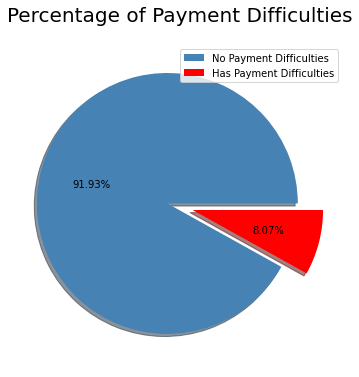

In [7]:
# Visualize the percentage of the target variable

ax = train.groupby(['TARGET']).count().plot(kind = 'pie', y = 'SK_ID_CURR',
                                            colors = ['steelblue', 'red'], autopct = '%1.2f%%',
                                            explode = (0.1, 0.1), shadow = True, labels = None, figsize = (12,6))
plt.legend(['No Payment Difficulties', 'Has Payment Difficulties'], loc = 'upper right', prop = {'size': 10})
plt.ylabel('')
plt.title('Percentage of Payment Difficulties', size = 20, y = 1.05)

There are about **92%** of the total loans (around 283K loans) which customers **did not had any problems** in paying the loan in given time. Meanwhile, there are only about **8%** of the total loans (around 24K loans) in this dataset involved the customers **having problems** in paying the loan.

We could see that this dataset is **imbalanced**. Therefore, we will conduct special treatment or **resampling**. The resampling step will be carried out in the model building section.

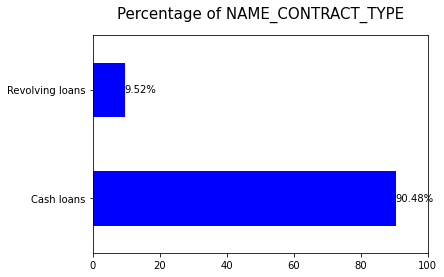

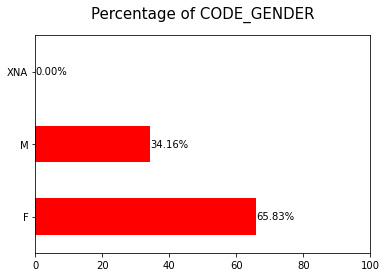

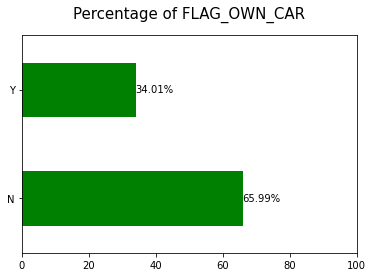

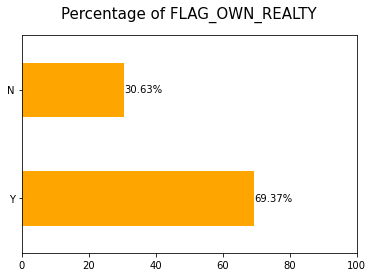

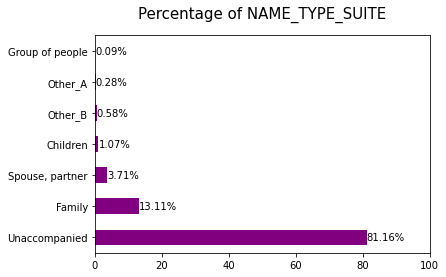

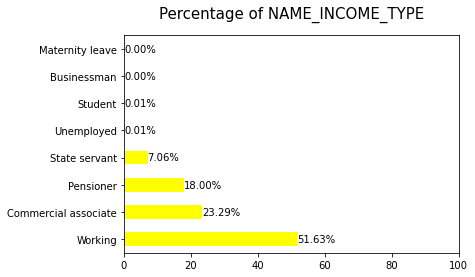

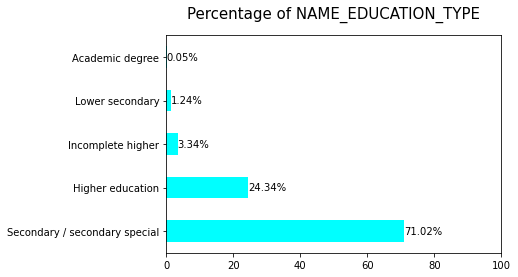

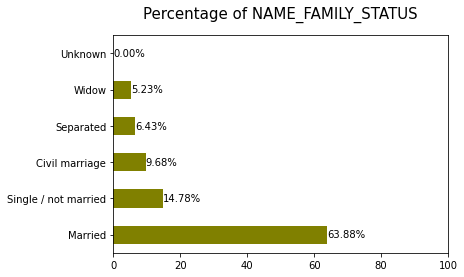

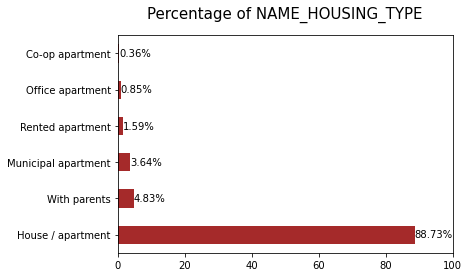

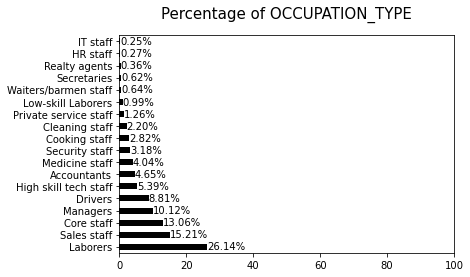

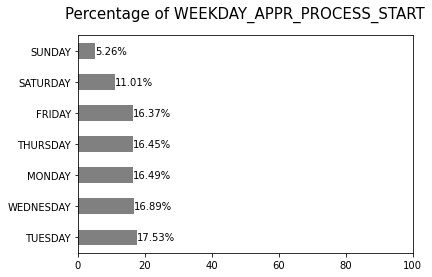

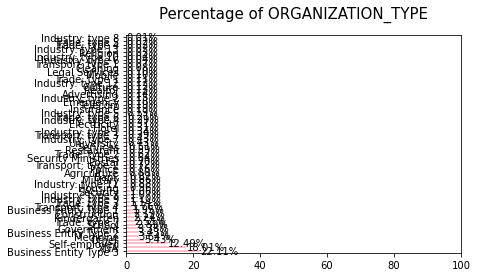

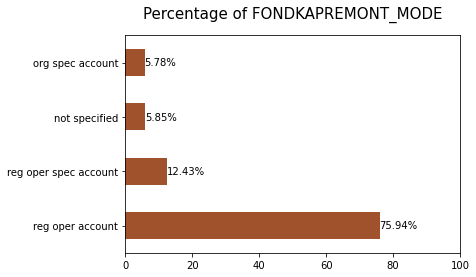

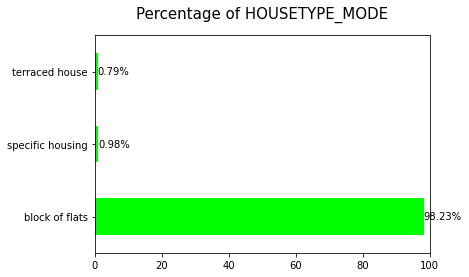

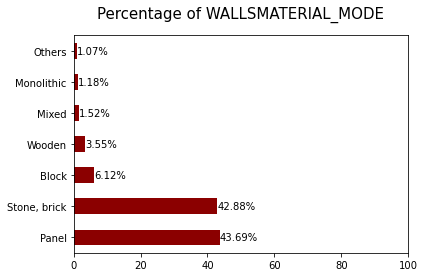

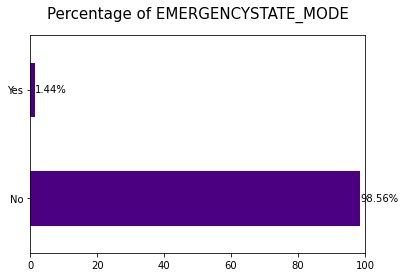

In [8]:
# Visualize the percentage of each category
colors = {cat_var[0]:'blue', cat_var[1]:'red', cat_var[2]:'green', cat_var[3]:'orange', cat_var[4]:'purple',
          cat_var[5]:'yellow', cat_var[6]:'cyan', cat_var[7]:'olive', cat_var[8]:'brown', cat_var[9]:'black',
          cat_var[10]:'gray', cat_var[11]:'pink', cat_var[12]:'sienna', cat_var[13]:'lime',
          cat_var[14]:'darkred', cat_var[15]:'indigo'}

for i in cat_var:
    # Let's calculate the percentage of each category.
    x = train[i].value_counts(normalize = True)*100
    #plot the bar graph of percentage categories
    ax = x.plot.barh(color = colors[i])
    ax.bar_label(ax.containers[0], fmt = '%.2f', label_type = 'edge')
    for t in ax.texts:
        t.set_text(t.get_text() + "%")
    ax.set_xlim(right = 100)
    plt.title('Percentage of {}'.format(i), size = 15, y = 1.05)
    plt.show()
    print("="*60,"\n")

## 2. Bivariate Analysis

### Categorical Features vs Target (Customer Payment Abilities)

In [9]:
train['TARGET'] = train['TARGET'].replace([0,1], ['No Payment Difficulties','Has Payment Difficulties'])

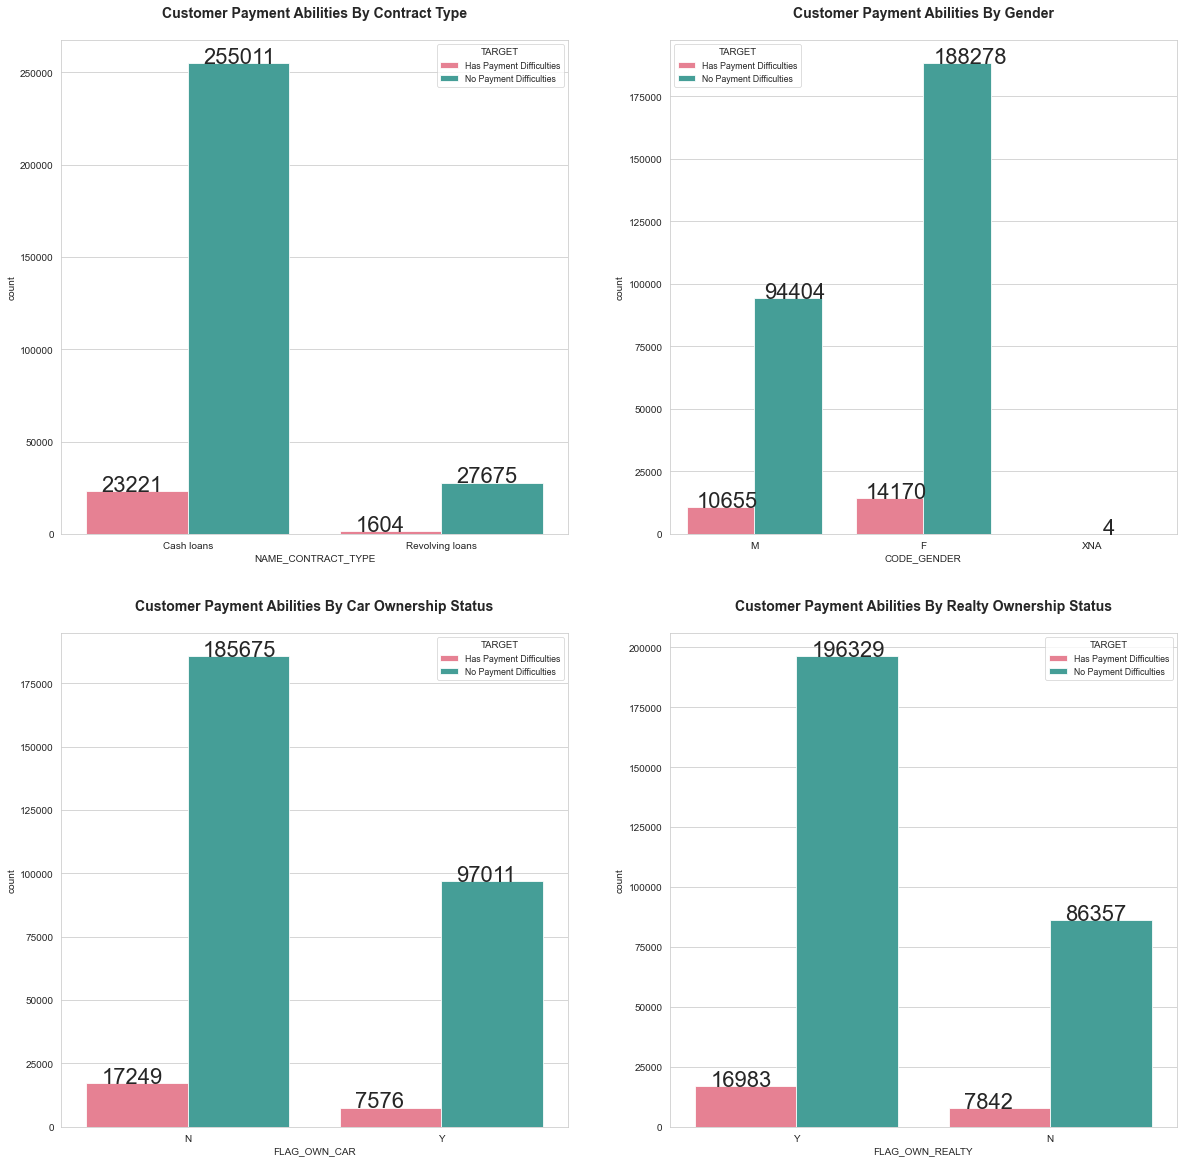

In [10]:
# Visualizations of Customer Payment Abilities by Contract Type, Gender, Car Ownership, and Realty Ownership
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize = (20,20))
sns.set_context('paper', font_scale = 1)

# Contract Type vs Customer Payment Abilities
ax[0][0].set_title('Customer Payment Abilities By Contract Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_CONTRACT_TYPE', data = train, hue = 'TARGET', palette = 'husl', ax=ax[0][0])
for p in ax[0][0].patches:
    ax[0][0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+20), size = 22)

# Gender vs Customer Payment Abilities
ax[0][1].set_title('Customer Payment Abilities By Gender\n', fontweight='bold', fontsize=14)
sns.countplot(x='CODE_GENDER', data = train, hue = 'TARGET', palette = 'husl', ax=ax[0][1])
for p in ax[0][1].patches:
    ax[0][1].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+20), size = 22)

# Car Ownership Status vs Customer Payment Abilities
ax[1][0].set_title('\nCustomer Payment Abilities By Car Ownership Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_CAR', data = train, hue = 'TARGET', palette = 'husl', ax=ax[1][0])
for p in ax[1][0].patches:
    ax[1][0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+20), size = 22)

# Realty Ownership Status vs Customer Payment Abilities
ax[1][1].set_title('\nCustomer Payment Abilities By Realty Ownership Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_REALTY', data = train, hue = 'TARGET', palette = 'husl', ax=ax[1][1])
for p in ax[1][1].patches:
    ax[1][1].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+20), size = 22)

1. The majority of total loans in this dataset are accounted by **Cash Loans** with a total around 278K loans. Meanwhile, Revolving Loans tend to have a much lower amount of around 29K loans compared to Cash Loans.
2. **Female** customers tend to apply more loans than Male. It can be seen that there are about 202K loans applied by women and about 105K loans applied by men.
3. Customers who **do not own a car** tend to apply more loans than the ones who own. There are about 203K loans applied by customers who do not won a car and about 104K loans applied by customers who own a car.
4. Customers who **own a house/flat** tend to apply more loans than the ones who do not. There are about 213K loans applied by customers who own a house/flat and about 94K loans applied by customers who do not own a house/flat.

In [11]:
# Contract Type vs Customer Payment Abilities
df_train[['NAME_CONTRACT_TYPE','TARGET']].groupby(['NAME_CONTRACT_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False).reset_index(drop=True)

,NAME_CONTRACT_TYPE,TARGET
0,Cash loans,0.083459
1,Revolving loans,0.054783


Customers who applied for **Cash Loans** tend to have **more payment difficulties** than Revolving Loans.

In [12]:
# Gender vs Customer Payment Abilities
df_train[['CODE_GENDER','TARGET']].groupby(['CODE_GENDER'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False).reset_index(drop=True)

,CODE_GENDER,TARGET
0,M,0.101419
1,F,0.069993
2,XNA,0.000000


**Male** customers tend to have **more payment difficulties** than Females.

In [13]:
# Car Ownership vs Customer Payment Abilities
df_train[['FLAG_OWN_CAR','TARGET']].groupby(['FLAG_OWN_CAR'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False).reset_index(drop=True)

,FLAG_OWN_CAR,TARGET
0,N,0.085002
1,Y,0.072437


**Customers who do not own a car** tend to have **more payment difficulties** than customers who do.

In [14]:
# Realty Ownership vs Customer Payment Abilities
df_train[['FLAG_OWN_REALTY','TARGET']].groupby(['FLAG_OWN_REALTY'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False).reset_index(drop=True)

,FLAG_OWN_REALTY,TARGET
0,N,0.083249
1,Y,0.079616


**Customers who do not own a house/flat** tend to have **more payment difficulties** than customers who do.

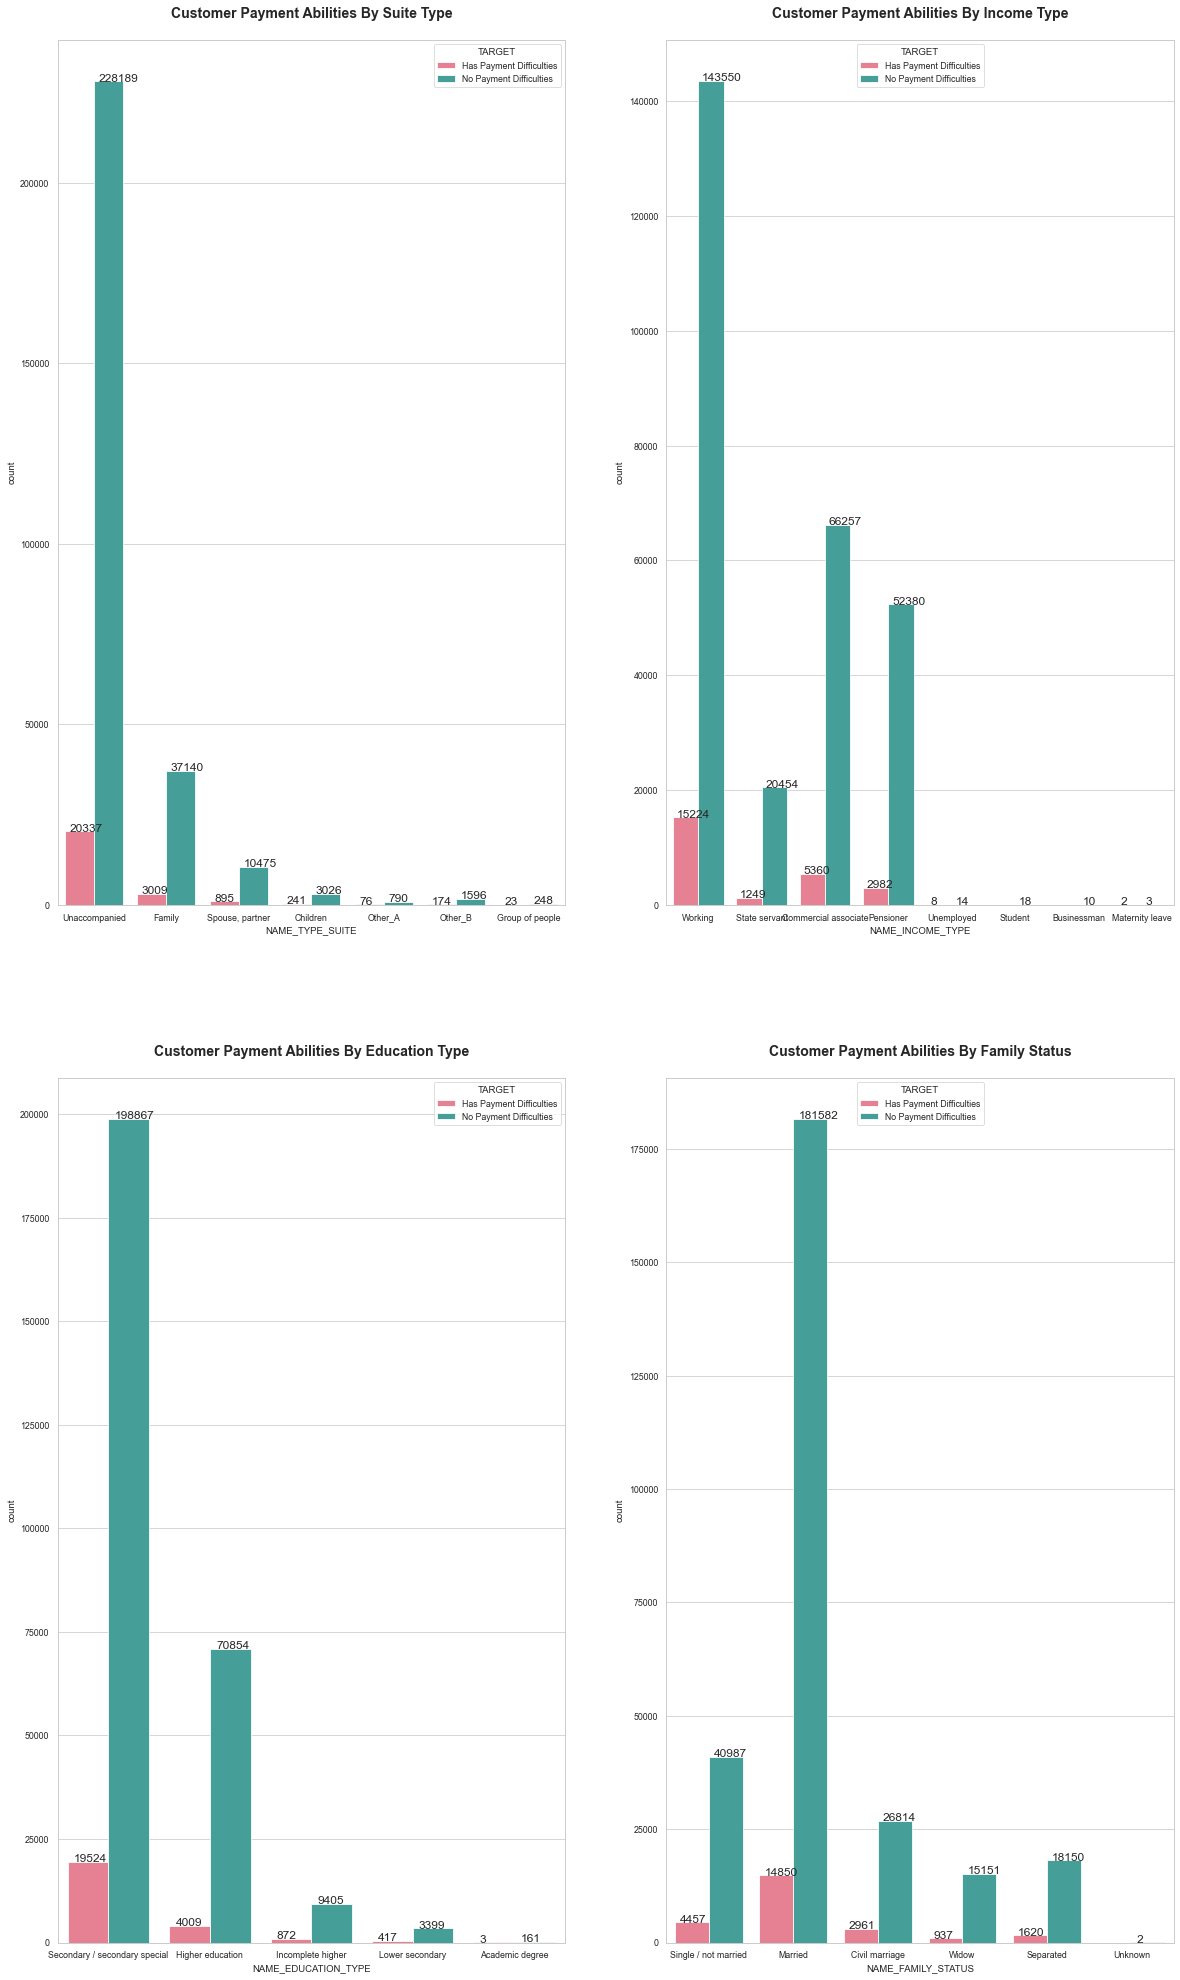

In [15]:
# Visualizations of Customer Payment Abilities by Suite Type, Income Type, Education Type, and Family Status
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize = (20,35))
sns.set_context('paper', font_scale = 1)

# Suite Type vs Customer Payment Abilities
ax[0][0].set_title('Customer Payment Abilities By Suite Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_TYPE_SUITE', data = train, hue = 'TARGET', palette = 'husl', ax=ax[0][0])
for p in ax[0][0].patches:
    ax[0][0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+20), size = 12)

# Income Type vs Customer Payment Abilities
ax[0][1].set_title('Customer Payment Abilities By Income Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_INCOME_TYPE', data = train, hue = 'TARGET', palette = 'husl', ax=ax[0][1])
for p in ax[0][1].patches:
    ax[0][1].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+20), size = 12)

# Education Type vs Customer Payment Abilities
ax[1][0].set_title('\nCustomer Payment Abilities By Education Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_EDUCATION_TYPE', data = train, hue = 'TARGET', palette = 'husl', ax=ax[1][0])
for p in ax[1][0].patches:
    ax[1][0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+20), size = 12)

# Family Status vs Customer Payment Abilities
ax[1][1].set_title('\nCustomer Payment Abilities By Family Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_FAMILY_STATUS', data = train, hue = 'TARGET', palette = 'husl', ax=ax[1][1])
for p in ax[1][1].patches:
    ax[1][1].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+20), size = 12)

1. Based on the Suite Type, customers who are **Unaccompanied** have applied for the largest majority of loans with a total around 248K loans applied.
2. The majority of the loans applied based on the Income Type are accounted by customers who have income type of **Working** with a total around 159K loans applied.
3. Customers who have highest education of **Secondary/Secondary Special** have applied for the largest majority of loans with a total around 218K loans applied.
4. Customers who are **Married** based on their Family Status have applied for the largest majority of loans with a total around 196K loans applied.

In [16]:
# Suite Type vs Customer Payment Abilities
df_train[['NAME_TYPE_SUITE','TARGET']].groupby(['NAME_TYPE_SUITE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False).reset_index(drop=True)

,NAME_TYPE_SUITE,TARGET
0,Other_B,0.098305
1,Other_A,0.087760
2,Group of people,0.084871
3,Unaccompanied,0.081830
4,"Spouse, partner",0.078716
5,Family,0.074946
6,Children,0.073768


Customers who are accompanied by **Other B** and **Other A** have the highest percentage of having difficulties in paying the loans.

In [17]:
# Income Type vs Customer Payment Abilities
df_train[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False).reset_index(drop=True)

,NAME_INCOME_TYPE,TARGET
0,Maternity leave,0.400000
1,Unemployed,0.363636
2,Working,0.095885
3,Commercial associate,0.074843
4,State servant,0.057550
5,Pensioner,0.053864
6,Businessman,0.000000
7,Student,0.000000


**Businessmen** and **Students** do not have any difficulties in paying the loans. Meanwhile, customers with the income type of **Maternity leave** and **Unemployed** have the highest percentage of having difficulties in paying the loans.

In [18]:
# Education Type vs Customer Payment Abilities
df_train[['NAME_EDUCATION_TYPE','TARGET']].groupby(['NAME_EDUCATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False).reset_index(drop=True)

,NAME_EDUCATION_TYPE,TARGET
0,Lower secondary,0.109277
1,Secondary / secondary special,0.089399
2,Incomplete higher,0.084850
3,Higher education,0.053551
4,Academic degree,0.018293


Customers with highest education of **Lower secondary** have the highest percentage of having difficulties in paying the loans. Meanwhile, the lowest percentage goes to the customers with highest education of **Academic degree**.

In [19]:
# Family Status vs Customer Payment Abilities
df_train[['NAME_FAMILY_STATUS','TARGET']].groupby(['NAME_FAMILY_STATUS'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False).reset_index(drop=True)

,NAME_FAMILY_STATUS,TARGET
0,Civil marriage,0.099446
1,Single / not married,0.098077
2,Separated,0.081942
3,Married,0.075599
4,Widow,0.058242
5,Unknown,0.000000


Customers with family status of **Civil Marriage** and **Single/Not Married** have the highest percentage of having difficulties in paying the loans. Meanwhile, the lowest percentage goes to the customers with family status of **widow**.

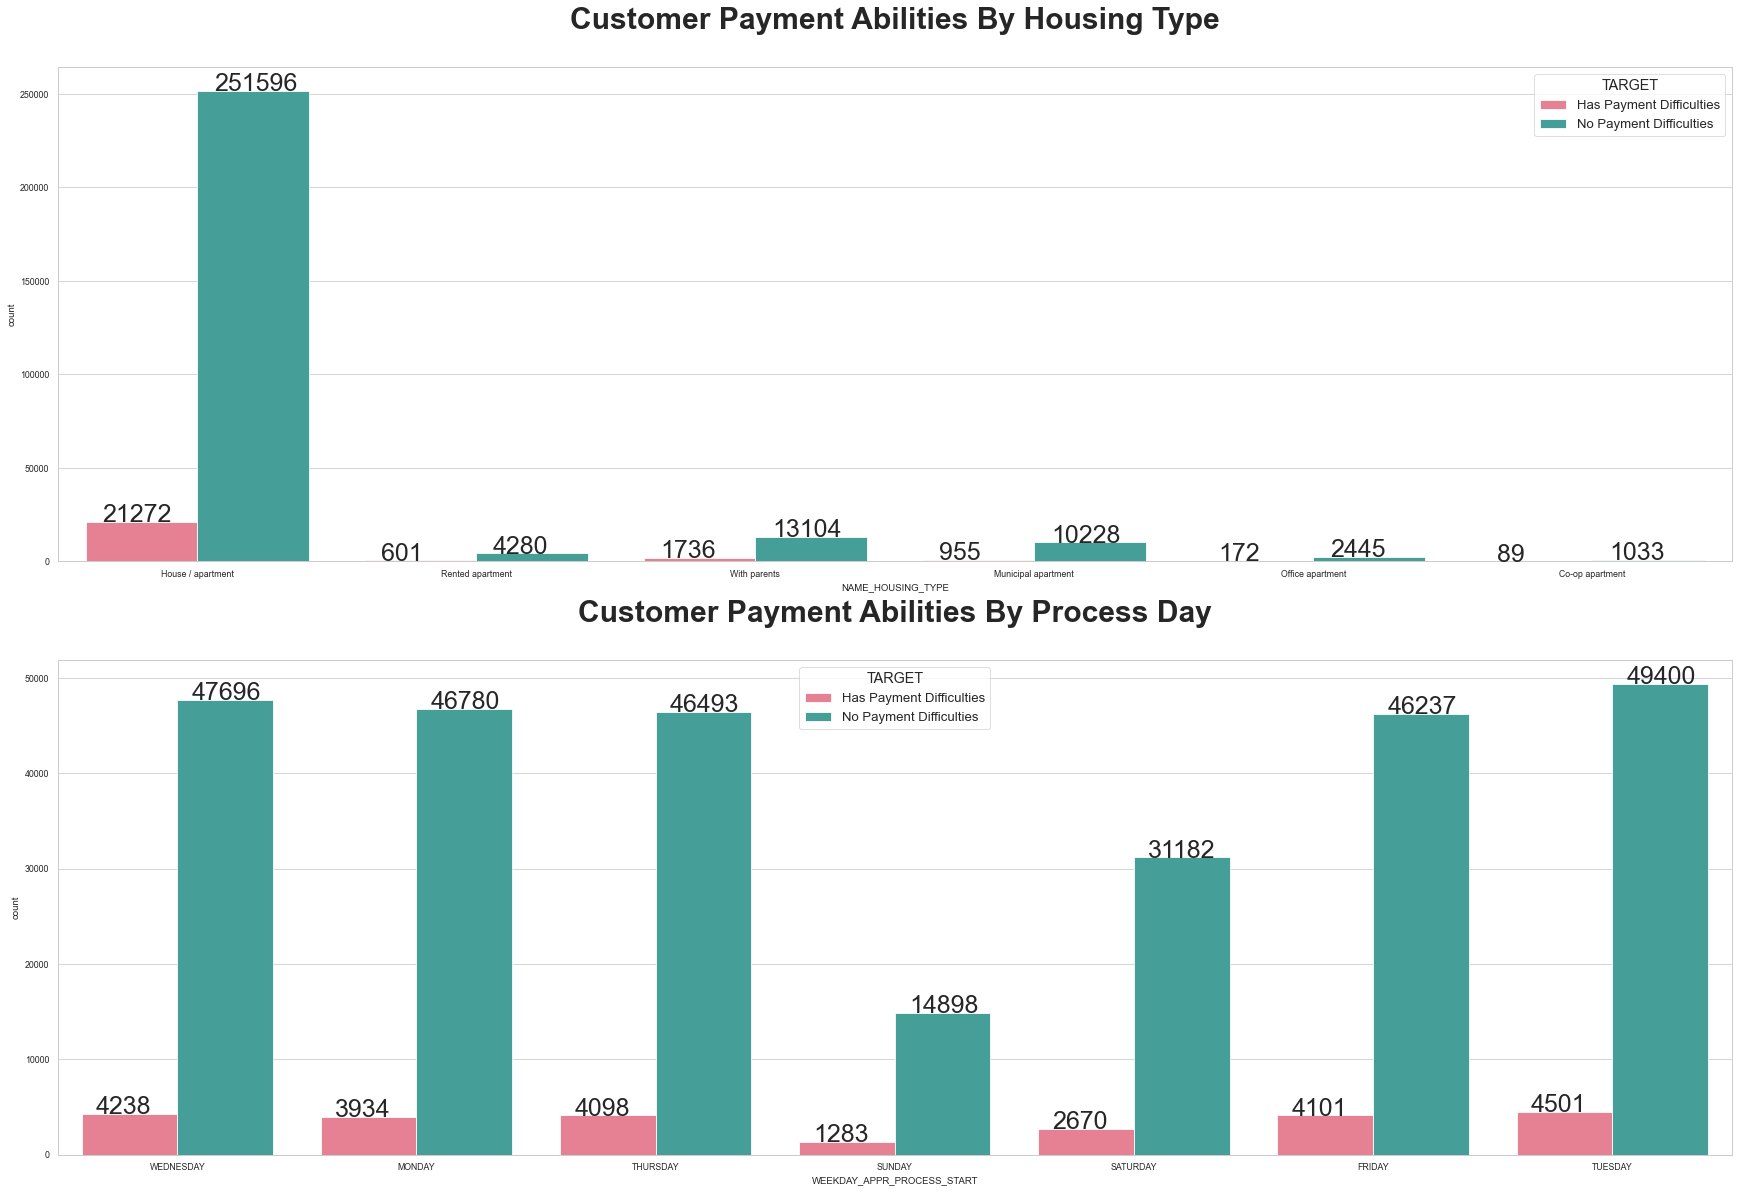

In [20]:
# Visualizations of Customer Payment Abilities by Housing Type and Process Day

sns.set_style('whitegrid')
fig, ax = plt.subplots(2,1, figsize = (30,20))
sns.set_context('paper', font_scale = 1.5)

# Housing Type vs Customer Payment Abilities
ax[0].set_title('Customer Payment Abilities By Housing Type\n', fontweight='bold', fontsize=30)
sns.countplot(x='NAME_HOUSING_TYPE', data = train, hue = 'TARGET', palette = 'husl', ax=ax[0])
for p in ax[0].patches:
    ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+20), size = 25)

# Process Day vs Customer Payment Abilities
ax[1].set_title('\nCustomer Payment Abilities By Process Day\n', fontweight='bold', fontsize=30)
sns.countplot(x='WEEKDAY_APPR_PROCESS_START', data = train, hue = 'TARGET', palette = 'husl', ax=ax[1])
for p in ax[1].patches:
    ax[1].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+20), size = 25)

1. Customers who live in a **House/Apartment** have the highest numbers of loan applications with a total about 273K loans applied.
2. It can be seen that each application Processing Day has almost the same numbers of loan applications in weekdays, but tends to be lower in the weekend (Saturday and Sunday).

In [21]:
# Housing Type vs Customer Payment Abilities
df_train[['NAME_HOUSING_TYPE','TARGET']].groupby(['NAME_HOUSING_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False).reset_index(drop=True)

,NAME_HOUSING_TYPE,TARGET
0,Rented apartment,0.123131
1,With parents,0.116981
2,Municipal apartment,0.085397
3,Co-op apartment,0.079323
4,House / apartment,0.077957
5,Office apartment,0.065724


Customers who live in a **Rented apartment** and **With parents** tend to have the highest percentage of having difficulties in paying the loans, while the lowest goes to the customers who live in an **Office apartment**.

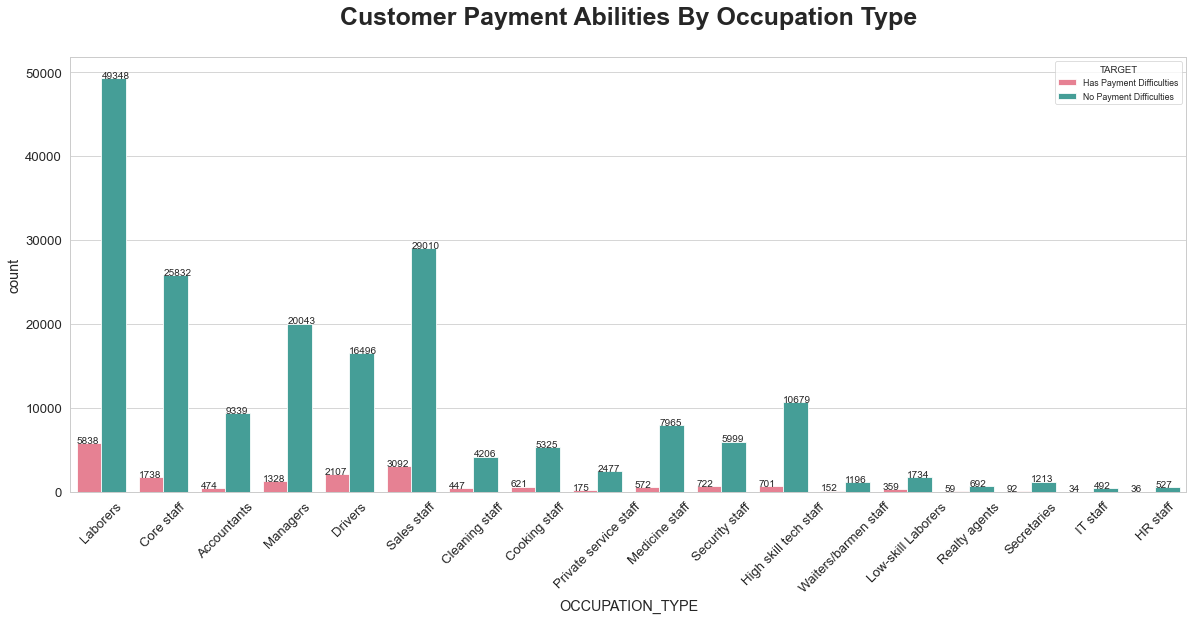

In [22]:
# Visualization of Customer Payment Abilities by Occupation Type
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(20,8))
sns.set_context('paper', font_scale=1)

ax.set_title('Customer Payment Abilities By Occupation Type\n', fontweight='bold', fontsize=25)
sns.countplot(x='OCCUPATION_TYPE', data = train, hue = 'TARGET', palette = 'husl', ax=ax)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()), size = 10)
plt.xticks(rotation = 45)
plt.show()

**Laborers** have applied for the largest majority of loans with a total around 55K loans applied

In [23]:
# Occupation Type vs Customer Payment Abilities
df_train[['OCCUPATION_TYPE','TARGET']].groupby(['OCCUPATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False).reset_index(drop=True)

,OCCUPATION_TYPE,TARGET
0,Low-skill Laborers,0.171524
1,Drivers,0.113261
2,Waiters/barmen staff,0.112760
3,Security staff,0.107424
4,Laborers,0.105788
5,Cooking staff,0.104440
6,Sales staff,0.096318
7,Cleaning staff,0.096067
8,Realty agents,0.078562
9,Secretaries,0.070498


**Low-skill Laborers** tend to have the highest percentage of having difficulties in paying the loans. Meanwhile, **Accountants** have the lowest percentage of having difficulties.

### Numerical Features vs Target (Customer Payment Abilities)

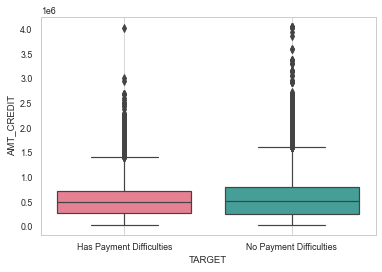

In [24]:
# Amount Credit vs Customer Payment Abilities
sns.boxplot(x = 'TARGET', y = 'AMT_CREDIT', data = train, palette = 'husl')
plt.grid()
plt.show()

There are no significant difference in Amount Credit of Loan between Customers who have payment difficulties and who do not.

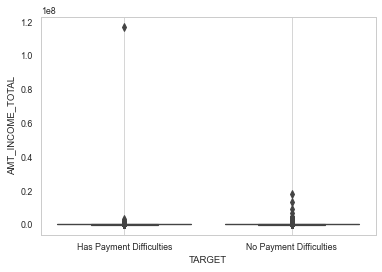

In [25]:
# Amount Income vs Target
sns.boxplot(x = 'TARGET', y = 'AMT_INCOME_TOTAL', data = train, palette = 'husl')
plt.grid()
plt.show()

There are no significant difference in Amount of Income between Customers who have payment difficulties and who do not. Howerver, based on the outliers, we could infer that as the customer's income increases, the probability that the customer will not have difficulty repaying the loan also increases.

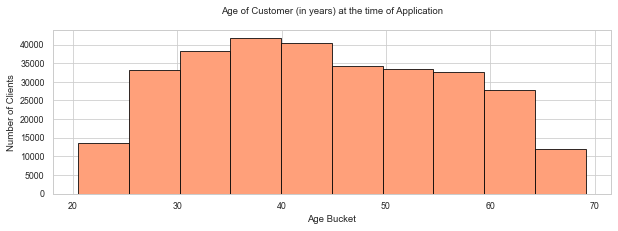

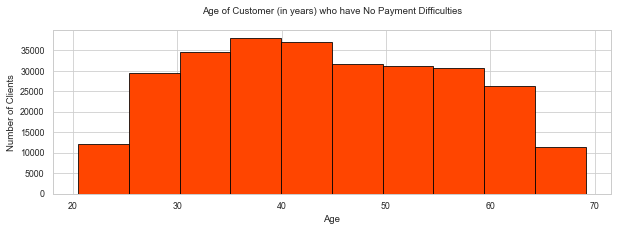

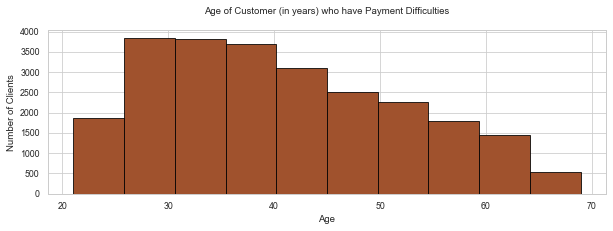

In [26]:
# Customer Age vs Target
no_age = df_train[df_train['TARGET'] == 0]['DAYS_BIRTH'].values/-365
yes_age = df_train[df_train['TARGET'] == 1]['DAYS_BIRTH'].values/-365

plt.figure(figsize = (10,3))
plt.hist(df_train['DAYS_BIRTH'].values/-365, bins = 10, edgecolor='black', color='lightsalmon')
plt.title('Age of Customer (in years) at the time of Application\n')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize = (10,3))
plt.hist(no_age, bins = 10, edgecolor='black', color='orangered')
plt.title('Age of Customer (in years) who have No Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize = (10,3))
plt.hist(yes_age, bins = 10, edgecolor = 'black', color = 'sienna')
plt.title('Age of Customer (in years) who have Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

The majority of the customers who applied for loans are in the range of 30-45 years old, while the minority are the customers aged less than 25 and greater than 65.

Customers who have no payment difficulties are ranged between 35-45 years old, while the customers who have payment difficulties are in range 25-35 years old.

## Multivariate Analysis

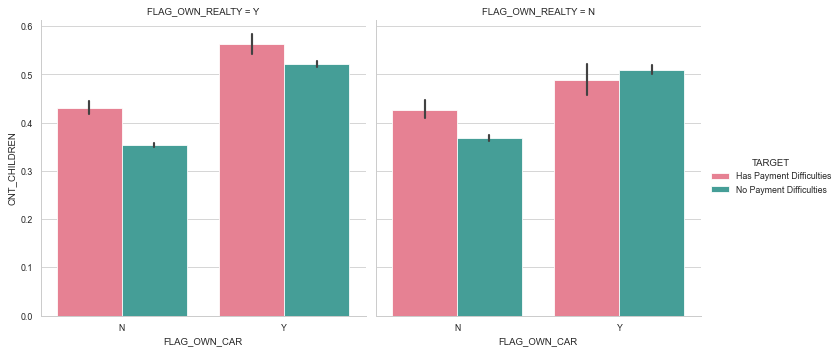

In [27]:
sns.catplot(x = 'FLAG_OWN_CAR', y = 'CNT_CHILDREN', 
            hue = 'TARGET', col = 'FLAG_OWN_REALTY', 
            kind = 'bar', palette = 'husl',
            data = train)
plt.show()

Customers who **own a house/flat** and/or **a car** with **higher numbers of children** tend to have more payment difficulties than customers who do not own a house/flat.

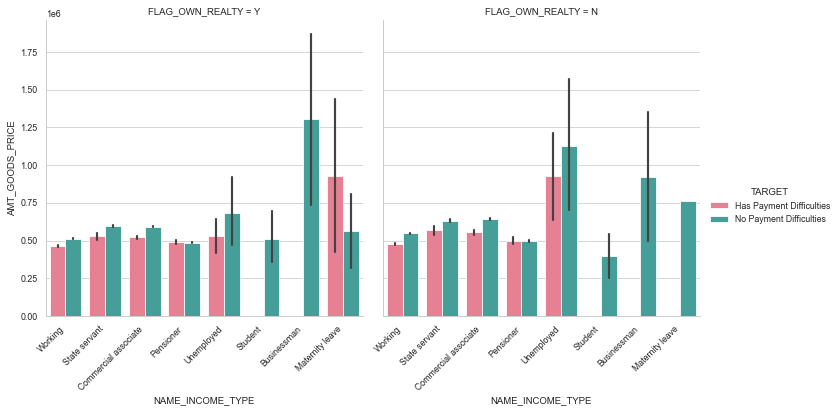

In [28]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE', y = 'AMT_GOODS_PRICE',
                  hue = 'TARGET', col = 'FLAG_OWN_REALTY',
                  kind = 'bar', palette = 'husl',
                  data = train)

fig.set_xticklabels(rotation = 45, horizontalalignment = 'right')
plt.show()

Customers with Income Type of **Maternity leave** who **own a house/flat** with the **higher price of the goods** tend to have more payment difficulties than the others.

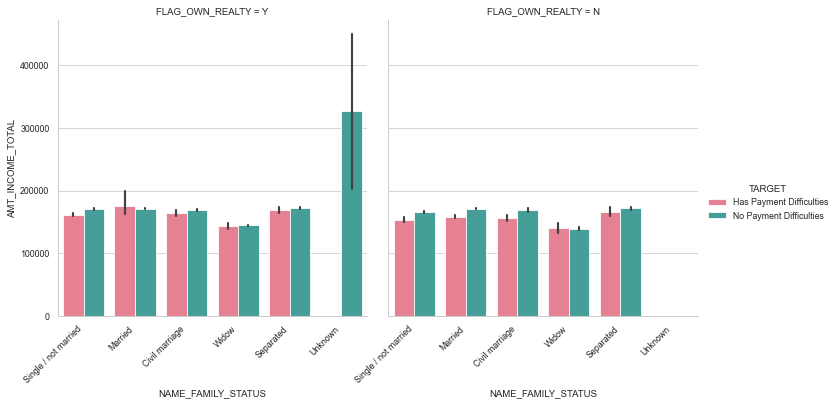

In [29]:
fig = sns.catplot(x = 'NAME_FAMILY_STATUS', y = 'AMT_INCOME_TOTAL',
                  hue = 'TARGET', col = 'FLAG_OWN_REALTY',
                  kind = 'bar', palette = 'husl',
                  data = train)

fig.set_xticklabels(rotation = 45, horizontalalignment = 'right')
plt.show()

Customers who are **Married** and **own a house/flat** with **higher amount of income** tend to have more payment difficulties than the others.

In [30]:
fam_real = train.groupby(by=['NAME_FAMILY_STATUS','FLAG_OWN_REALTY', 'TARGET'], as_index=False)['AMT_INCOME_TOTAL'].mean()
fam_real.sort_values(by = 'TARGET', ascending = False).reset_index(drop = True)
fam_real.style.background_gradient(cmap = 'Blues')

,NAME_FAMILY_STATUS,FLAG_OWN_REALTY,TARGET,AMT_INCOME_TOTAL
0,Civil marriage,N,Has Payment Difficulties,156693.366523
1,Civil marriage,N,No Payment Difficulties,168536.777268
2,Civil marriage,Y,Has Payment Difficulties,164301.462106
3,Civil marriage,Y,No Payment Difficulties,168476.458185
4,Married,N,Has Payment Difficulties,158015.694066
5,Married,N,No Payment Difficulties,171091.299446
6,Married,Y,Has Payment Difficulties,174888.788155
7,Married,Y,No Payment Difficulties,171129.614770
8,Separated,N,Has Payment Difficulties,165808.993458
9,Separated,N,No Payment Difficulties,171421.821114


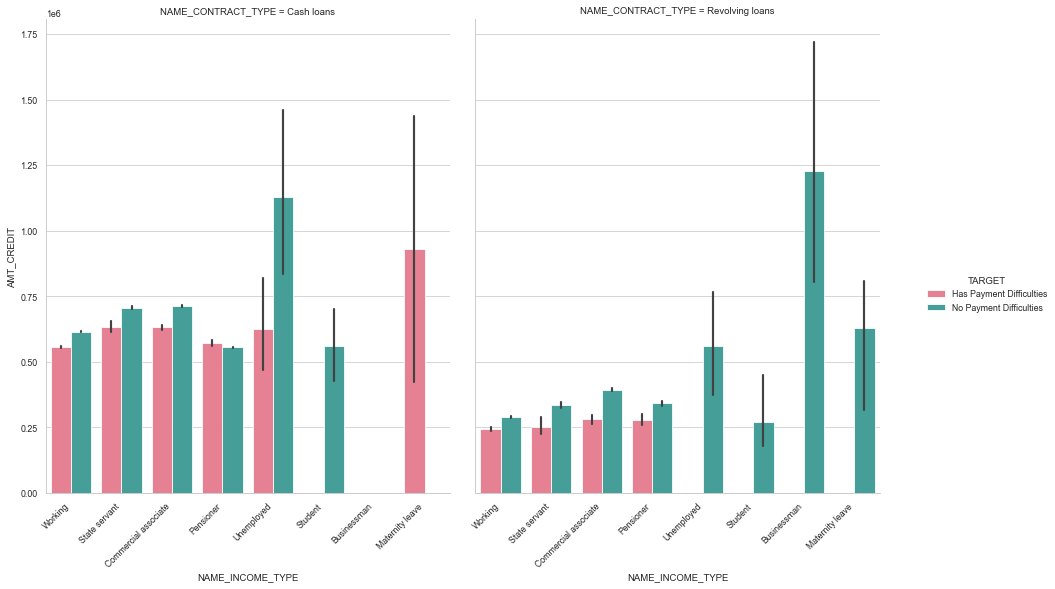

In [31]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE', y = 'AMT_CREDIT',
                  hue = 'TARGET', col = 'NAME_CONTRACT_TYPE',
                  kind = 'bar', palette = 'husl',
                  data = train)

fig.set_xticklabels(rotation = 45, horizontalalignment = 'right')
plt.gcf().set_size_inches(15, 8)
plt.show()

All of the customers with Income Type of **Maternity leave** who applied for **Cash Loans** have payment difficulties for moderate to high amounts credit of the loans.

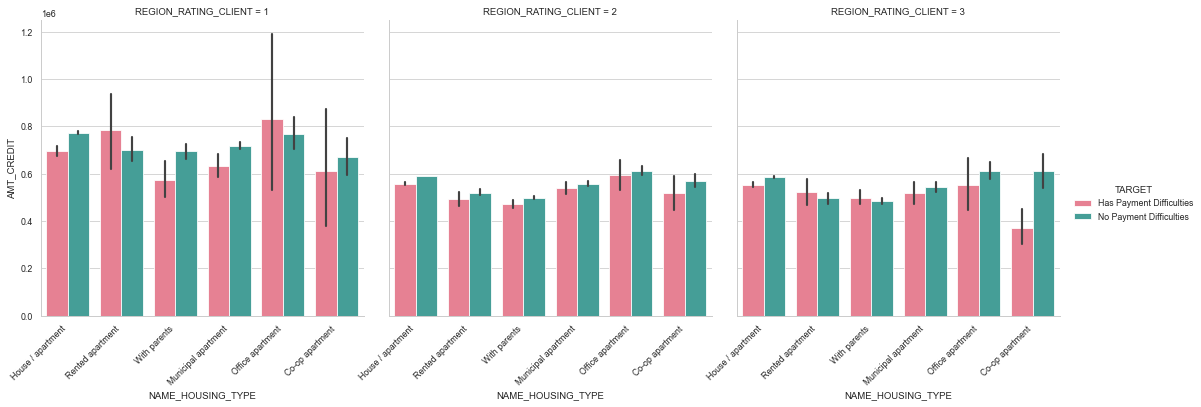

In [32]:
fig = sns.catplot(x = 'NAME_HOUSING_TYPE', y = 'AMT_CREDIT',
                  hue = 'TARGET', col = 'REGION_RATING_CLIENT',
                  kind = 'bar', palette = 'husl',
                  data = train)

fig.set_xticklabels(rotation = 45, horizontalalignment = 'right')
plt.show()

Customers who are living in a **Rented apartment** and an **Office apartment** in a **region with rating of 1** tend to have more payment difficulties than the others for moderate amounts credit of the loans.

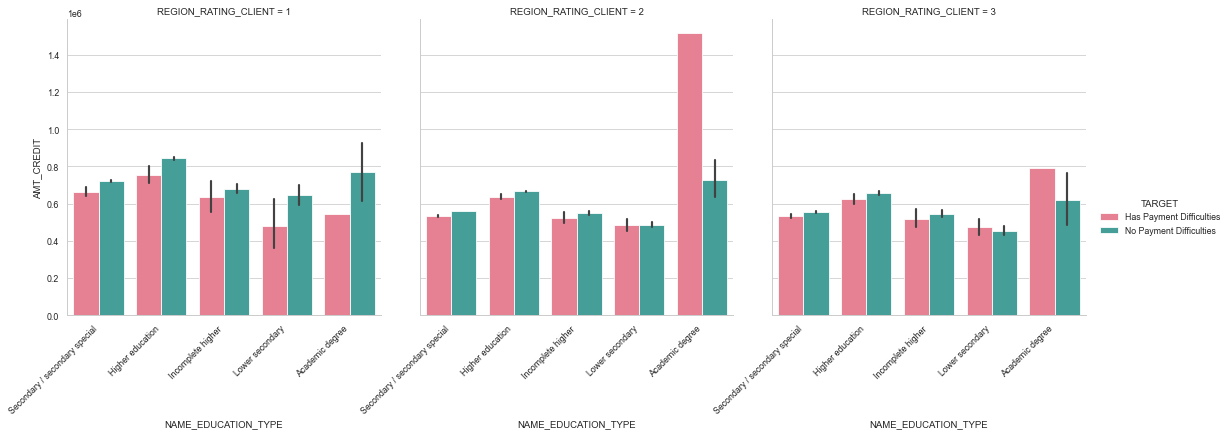

In [33]:
fig = sns.catplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT',
                  hue = 'TARGET', col = 'REGION_RATING_CLIENT',
                  kind = 'bar', palette = 'husl',
                  data = train)

fig.set_xticklabels(rotation = 45, horizontalalignment = 'right')
plt.show()

Customers who have highest education of **Academic degree** and are living in a **region with rating of 2 and 3** tend to have more payment difficulties than the others for moderate to high amounts credit of the loans.

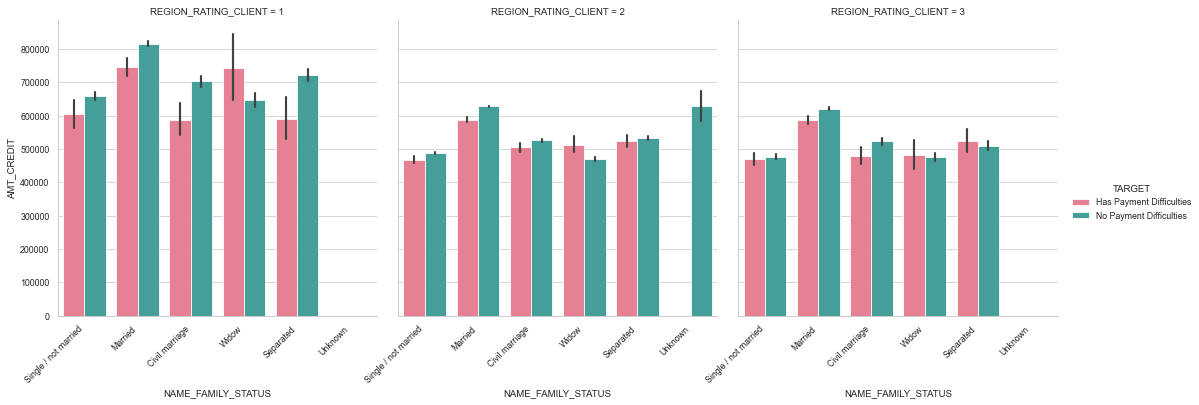

In [34]:
fig = sns.catplot(x = 'NAME_FAMILY_STATUS', y = 'AMT_CREDIT',
                  hue = 'TARGET', col = 'REGION_RATING_CLIENT',
                  kind = 'bar', palette = 'husl',
                  data = train)

fig.set_xticklabels(rotation = 45, horizontalalignment = 'right')
plt.show()

Customers who have family ftatus as **widow** whether they live in a **region with a rating of 1, 2, or 3**, have payment difficulties for moderate to high amounts credit of the loans. In addition, customers who have a family status as **separated** and live in **region with a rating of 3** are also facing the same problem.

# Data Preprocessing

In [35]:
# Check duplicate data
print('The number of duplication is:', df_train.duplicated().sum())

The number of duplication is: 0


,column_name,total_missing,percent_missing
0,SK_ID_CURR,0,0.000000
1,HOUR_APPR_PROCESS_START,0,0.000000
2,REG_REGION_NOT_WORK_REGION,0,0.000000
3,LIVE_REGION_NOT_WORK_REGION,0,0.000000
4,REG_CITY_NOT_LIVE_CITY,0,0.000000
5,REG_CITY_NOT_WORK_CITY,0,0.000000
6,LIVE_CITY_NOT_WORK_CITY,0,0.000000
7,ORGANIZATION_TYPE,0,0.000000
8,FLAG_DOCUMENT_21,0,0.000000
9,FLAG_DOCUMENT_20,0,0.000000


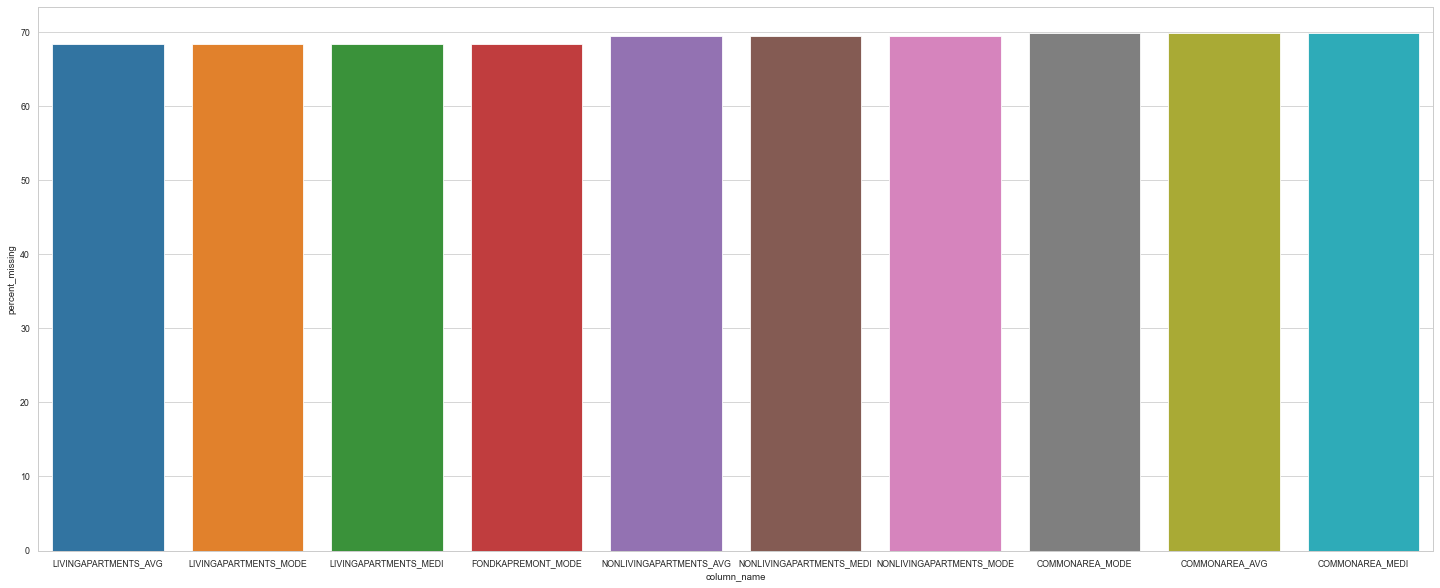

In [36]:
# Check Missing Value

def get_percentMissing(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    tot_missing = df.isnull().sum() 
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'total_missing': tot_missing,
                                     'percent_missing': percent_missing})

    missing_value_df.sort_values('percent_missing',inplace = True)
    a4_dims = (25, 10)
    # df = mylib.load_data()
    fig, ax = plt.subplots(figsize = a4_dims)
    sns.barplot(x = 'column_name', y = 'percent_missing',ax = ax, data = missing_value_df[-10:],)    
    return missing_value_df.reset_index(drop = True)

get_percentMissing(df_train)

In [37]:
# Remove features with total missing values greater than 40%
count_nv = pd.DataFrame(df_train.isnull().sum(), columns=['Total Null Data']).reset_index()
count_nv['Percentage'] = (count_nv['Total Null Data'] / len(df_train)) * 100
count_nv[count_nv['Percentage'] > 40].sort_values(by='Percentage', ascending=False)

missing_data = list(count_nv[count_nv['Percentage'] > 40]['index'])
df_train.drop(columns = missing_data, inplace = True)
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

<AxesSubplot:xlabel='OBS_30_CNT_SOCIAL_CIRCLE', ylabel='Density'>

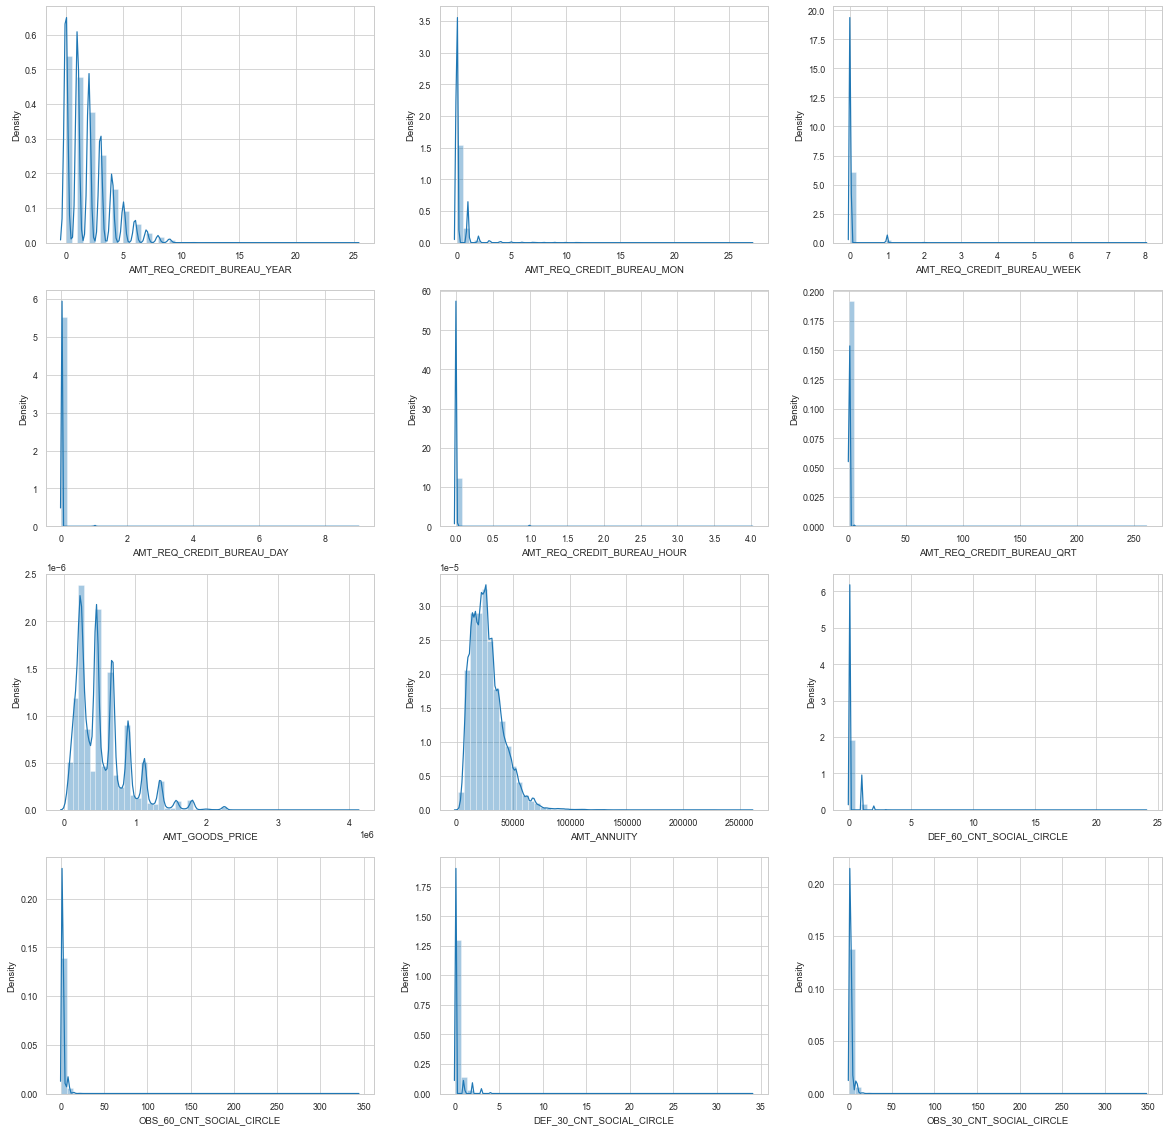

In [38]:
# Distribution of numerical features that have missing values part 1
sns.set_style('whitegrid')
fig, ax = plt.subplots(4,3, figsize = (20,20))
sns.set_context('paper', font_scale = 1)

sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_YEAR'], ax = ax[0][0])
sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_MON'], ax = ax[0][1])
sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_WEEK'], ax = ax[0][2])
sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_DAY'], ax = ax[1][0])
sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_HOUR'], ax = ax[1][1])
sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_QRT'], ax = ax[1][2])
sns.distplot(df_train['AMT_GOODS_PRICE'], ax = ax[2][0])
sns.distplot(df_train['AMT_ANNUITY'], ax = ax[2][1])
sns.distplot(df_train['DEF_60_CNT_SOCIAL_CIRCLE'], ax = ax[2][2])
sns.distplot(df_train['OBS_60_CNT_SOCIAL_CIRCLE'], ax = ax[3][0])
sns.distplot(df_train['DEF_30_CNT_SOCIAL_CIRCLE'], ax = ax[3][1])
sns.distplot(df_train['OBS_30_CNT_SOCIAL_CIRCLE'], ax = ax[3][2])

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DAYS_LAST_PHONE_CHANGE', ylabel='Density'>

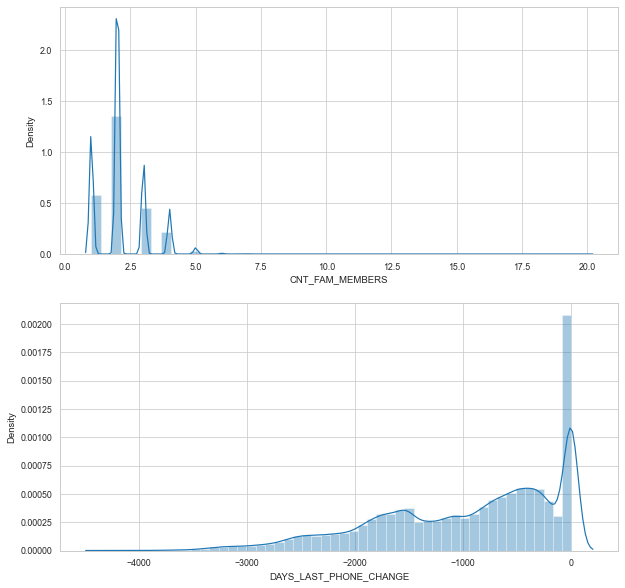

In [39]:
# Distribution of numerical features that have missing values part 2
sns.set_style('whitegrid')
fig, ax = plt.subplots(2, figsize = (10,10))
sns.set_context('paper', font_scale = 1)

sns.distplot(df_train['CNT_FAM_MEMBERS'], ax = ax[0])
sns.distplot(df_train['DAYS_LAST_PHONE_CHANGE'], ax = ax[1])

We could see that the distribution of numerical features above is skewed. Therefore, the missing values in those features will be imputed with the median.

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

,column_name,total_missing,percent_missing
0,SK_ID_CURR,0,0.0
1,FLAG_DOCUMENT_6,0,0.0
2,FLAG_DOCUMENT_5,0,0.0
3,FLAG_DOCUMENT_4,0,0.0
4,FLAG_DOCUMENT_3,0,0.0
5,FLAG_DOCUMENT_2,0,0.0
6,DAYS_LAST_PHONE_CHANGE,0,0.0
7,FLAG_DOCUMENT_7,0,0.0
8,DEF_60_CNT_SOCIAL_CIRCLE,0,0.0
9,DEF_30_CNT_SOCIAL_CIRCLE,0,0.0


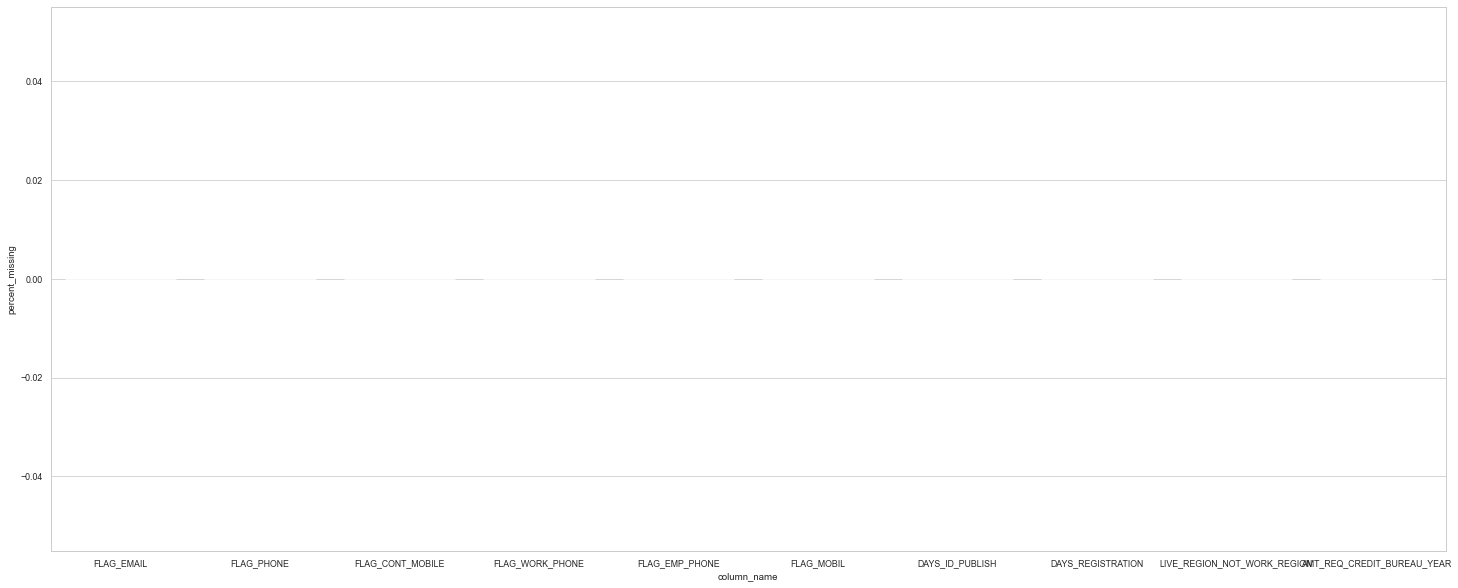

In [41]:
# Impute missing values with median because the data is skewed for numerical features
# Impute missing values with mode for categorical features

cat_var_new = df_train.select_dtypes(include = ['object']).columns.tolist()
num_var_new = df_train.select_dtypes(exclude = ['object']).columns.tolist()

for column in df_train:
    if df_train[column].isnull().any():
        if(column in cat_var_new):
            df_train[column] = df_train[column].fillna(df_train[column].mode()[0])
        else:
            df_train[column] = df_train[column].fillna(df_train[column].median())

get_percentMissing(df_train)

In [42]:
# Look for a numeric data type that has a unique value > 2
num = df_train.select_dtypes(exclude = 'object')
df_num = pd.DataFrame(num.nunique(), columns = ['Total_unique']).reset_index()
df_num = df_num.rename(columns = {'index' : 'Name_of_column'})

num_a = []
num_b = []

for i, y in enumerate(df_num['Name_of_column']):
    if df_num['Total_unique'][i] > 2:
        num_a.append(y)
    else:
        num_b.append(y)

In [43]:
num_a

['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

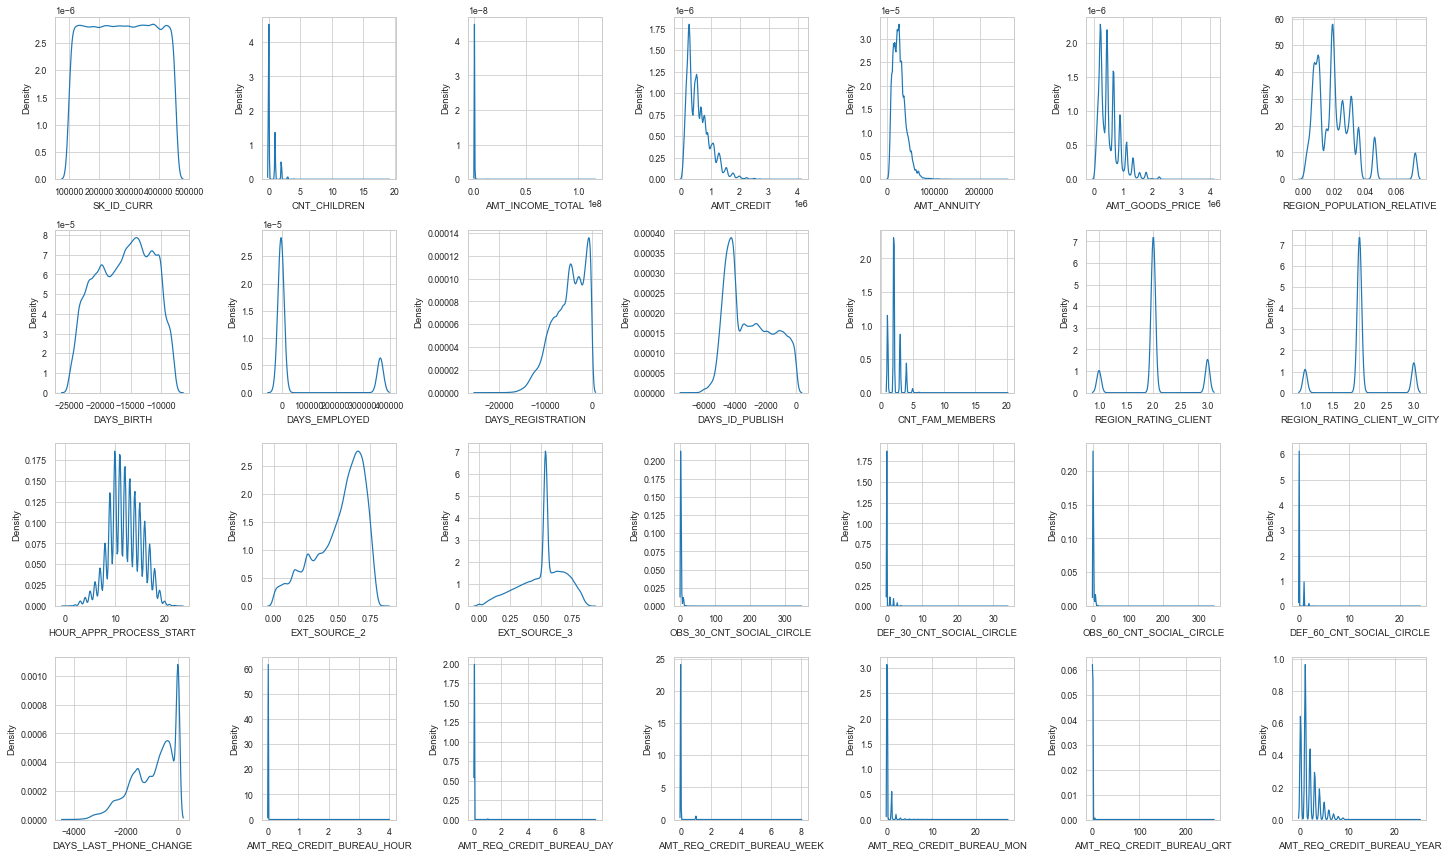

In [44]:
# Check the distribution of numeric data
plt.figure(figsize = (20,12))

for i, column in enumerate (df_train[num_a].columns, 1):
    plt.subplot(4,7,i)
    sns.kdeplot(data = df_train[num_a], x = df_train[column])
    plt.tight_layout()

The distribution of the numerical features is not close to the normal distribution. Therefore, it needs to be normalized in the model building section.

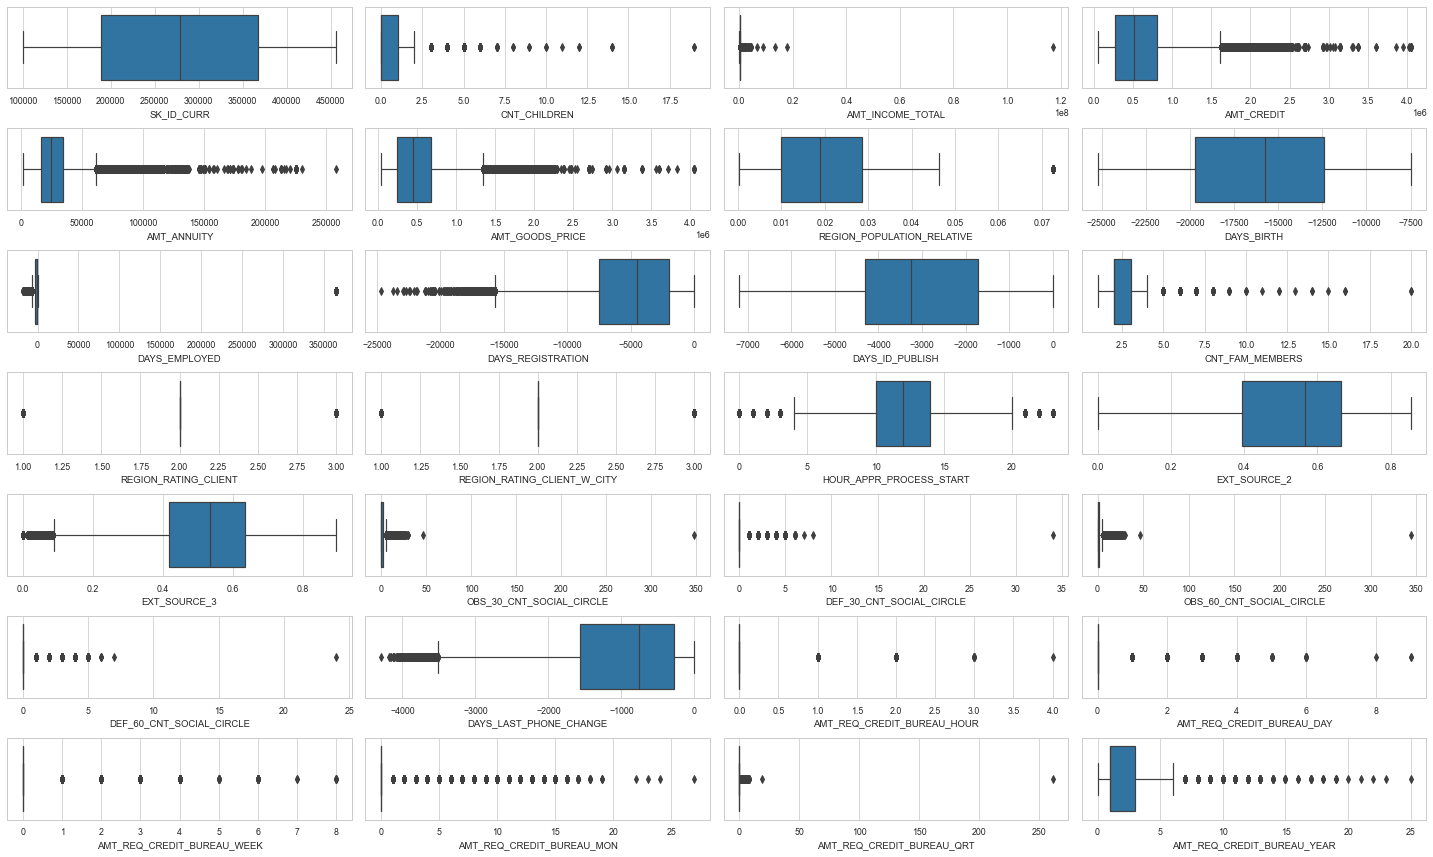

In [45]:
#Check Outlier
plt.figure(figsize = (20,12))

for i, column in enumerate (df_train[num_a].columns, 1):
    plt.subplot(7,4,i)
    sns.boxplot(data = df_train[num_a], x = df_train[column])
    plt.tight_layout()

We will not remove any outlier from the numerical features because there may be insights that can be drawn from these outliers.

# Machine Learning Modelling

## One-Hot Encoding

In [46]:
# One-Hot Encoding for object/category features

df_train[cat_var_new] = df_train[cat_var_new].apply(LabelEncoder().fit_transform)
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Selection

In [47]:
# Remove unnecessary feature
df_train.drop(['SK_ID_CURR'], inplace=True, axis=1)

# Convert negative value to positive
df_train.iloc[:,16:20] = df_train.iloc[:,16:20].abs()
df_train.iloc[:,45] = df_train.iloc[:,45].abs()

df_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# Split data
x = df_train.drop(['TARGET'], axis = 1)
y = df_train['TARGET']

# Select best features
best_features = SelectKBest(score_func = chi2, k = 10)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)
feature_scores = pd.concat([df_columns, df_scores], axis = 1)
feature_scores.columns = ['Features', 'Score']
feature_scores.sort_values(by = ['Score'], ascending = False).reset_index(drop=True)

,Features,Score
0,DAYS_EMPLOYED,1.954124e+08
1,AMT_GOODS_PRICE,1.223080e+08
2,AMT_CREDIT,7.669987e+07
3,DAYS_BIRTH,2.235391e+06
4,AMT_INCOME_TOTAL,1.624102e+06
5,DAYS_REGISTRATION,1.348566e+06
6,DAYS_LAST_PHONE_CHANGE,6.656876e+05
7,DAYS_ID_PUBLISH,6.195946e+05
8,AMT_ANNUITY,3.913092e+05
9,ORGANIZATION_TYPE,4.138607e+03


From the table above, we could see that the top 5 best features which correlate well with the payment difficulties are:

1. DAYS_EMPLOYED
2. AMT_GOODS_PRICE
3. AMT_CREDIT
4. DAYS_BIRTH
5. AMT_INCOME_TOTAL

## Handling Imbalance Data

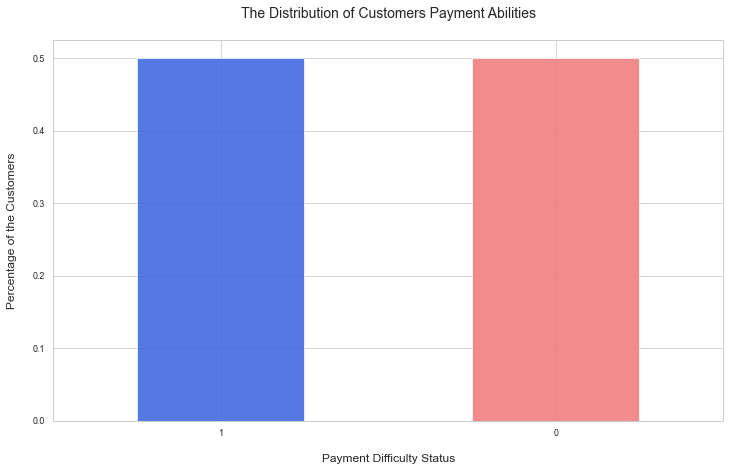

In [49]:
# Create two different dataframe of majority and minority class 
df_major = df_train[(df_train['TARGET'] == 0)] 
df_minor = df_train[(df_train['TARGET'] == 1)] 

# Upsampled minority class
df_minor_upsampled = resample(df_minor,
                              replace = True,    # sample with replacement
                              n_samples = 282686, # to match majority class
                              random_state = 42)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minor_upsampled, df_major])

# Plotting
fig = plt.figure(figsize = (12,7))
df_upsampled['TARGET'].value_counts(normalize=True).plot(kind = 'bar',
                                                         color = ['royalblue','lightcoral'],
                                                         alpha = 0.9,
                                                         rot = 0)
plt.title('The Distribution of Customers Payment Abilities\n', fontsize=14)
plt.ylabel('Percentage of the Customers\n', fontsize=12)
plt.xlabel('\nPayment Difficulty Status', fontsize=12)
plt.show()

The dataset is now balanced, so we may proceed to the next analysis steps.

## Split Data to Train and Test

In [50]:
# Define x and y features
# We will select only the top 20 features which correlate well with the target variable

x_balanced = df_upsampled[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
                           'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 
                           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 
                           'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                           'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                           'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]

y_balanced = df_upsampled['TARGET']

# splitting tha data
X_train, X_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(452297, 20) (113075, 20)


In [51]:
# normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Model Building

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.4f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.4f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.4f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.4f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.4f" % auc(fpr, tpr))

## 1. Logistic Regression

In [53]:
# Create an instance of the model. 
logreg = LogisticRegression() 

# Training the model. 
logreg.fit(X_train,y_train) 

# Do prediction. 
y_pred = logreg.predict(X_test)

print(eval_classification(logreg, y_pred, X_train, y_train, X_test, y_test))
print("="*25)

Accuracy (Test Set): 0.6729
Precision (Test Set): 0.6772
Recall (Test Set): 0.6614
F1-Score (Test Set): 0.6692
AUC: 0.6729
None


Confusion matrix

 [[38669 17832]
 [19156 37418]]

True Positives(TP) =  38669

True Negatives(TN) =  37418

False Positives(FP) =  17832

False Negatives(FN) =  19156


<AxesSubplot:>

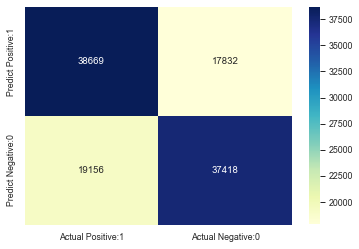

In [54]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positive:1', 'Actual Negative:0'],
                         index = ['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.68      0.68     56501
           1       0.68      0.66      0.67     56574

    accuracy                           0.67    113075
   macro avg       0.67      0.67      0.67    113075
weighted avg       0.67      0.67      0.67    113075



In [56]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

accuracy = (TP+TN) / float(TP+TN+FP+FN)
print('Classification accuracy : {0:0.4f}'.format(accuracy))

class_error = (FP+FN) / float(TP+TN+FP+FN)
print('Classification Error : {0:0.4f}'.format(class_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity or TPR : {0:0.4f}'.format(recall))

Classification accuracy : 0.6729
Classification Error : 0.3271
Precision : 0.6844
Recall or Sensitivity or TPR : 0.6687


In [57]:
# True Positive Rate (TPR)
TPR = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(TPR))

# False Positive Rate (FPR)
FPR = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(FPR))

# Spacificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

True Positive Rate : 0.6687
False Positive Rate : 0.3228
Specificity : 0.6772


## 2. Adaboost Classifier

In [58]:
from sklearn.ensemble import AdaBoostClassifier

# Create an instance of the model. 
ada = AdaBoostClassifier(n_estimators = 100, random_state = 0)

# Training the model. 
ada.fit(X_train, y_train)

# Do prediction. 
y_pred = ada.predict(X_test)

print(eval_classification(ada,y_pred,X_train,y_train, X_test, y_test))
print("="*25)

Accuracy (Test Set): 0.6767
Precision (Test Set): 0.6881
Recall (Test Set): 0.6472
F1-Score (Test Set): 0.6670
AUC: 0.6767
None


Confusion matrix

 [[39907 16594]
 [19961 36613]]

True Positives(TP) =  39907

True Negatives(TN) =  36613

False Positives(FP) =  16594

False Negatives(FN) =  19961


<AxesSubplot:>

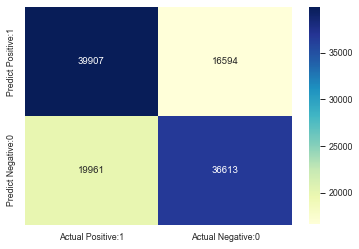

In [59]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positive:1', 'Actual Negative:0'],
                         index = ['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69     56501
           1       0.69      0.65      0.67     56574

    accuracy                           0.68    113075
   macro avg       0.68      0.68      0.68    113075
weighted avg       0.68      0.68      0.68    113075



In [61]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

accuracy = (TP+TN) / float(TP+TN+FP+FN)
print('Classification accuracy : {0:0.4f}'.format(accuracy))

class_error = (FP+FN) / float(TP+TN+FP+FN)
print('Classification Error : {0:0.4f}'.format(class_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity or TPR : {0:0.4f}'.format(recall))

Classification accuracy : 0.6767
Classification Error : 0.3233
Precision : 0.7063
Recall or Sensitivity or TPR : 0.6666


In [62]:
# True Positive Rate (TPR)
TPR = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(TPR))

# False Positive Rate (FPR)
FPR = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(FPR))

# Spacificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

True Positive Rate : 0.6666
False Positive Rate : 0.3119
Specificity : 0.6881


## 3. Nearest Centroid

In [63]:
from sklearn.neighbors import NearestCentroid

# Create an instance of the model. 
nc = NearestCentroid()

# Training the model. 
nc.fit(X_train, y_train)

# Do prediction. 
y_pred = nc.predict(X_test)

print(eval_classification(nc,y_pred,X_train,y_train, X_test, y_test))
print("="*25)

Accuracy (Test Set): 0.6516
Precision (Test Set): 0.6513
Recall (Test Set): 0.6533
F1-Score (Test Set): 0.6523
AUC: 0.6516
None


Confusion matrix

 [[36716 19785]
 [19613 36961]]

True Positives(TP) =  36716

True Negatives(TN) =  36961

False Positives(FP) =  19785

False Negatives(FN) =  19613


<AxesSubplot:>

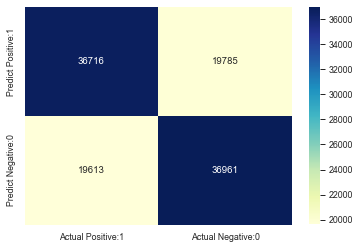

In [64]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positive:1', 'Actual Negative:0'],
                         index = ['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65     56501
           1       0.65      0.65      0.65     56574

    accuracy                           0.65    113075
   macro avg       0.65      0.65      0.65    113075
weighted avg       0.65      0.65      0.65    113075



In [66]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

accuracy = (TP+TN) / float(TP+TN+FP+FN)
print('Classification accuracy : {0:0.4f}'.format(accuracy))

class_error = (FP+FN) / float(TP+TN+FP+FN)
print('Classification Error : {0:0.4f}'.format(class_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity or TPR : {0:0.4f}'.format(recall))

Classification accuracy : 0.6516
Classification Error : 0.3484
Precision : 0.6498
Recall or Sensitivity or TPR : 0.6518


In [67]:
# True Positive Rate (TPR)
TPR = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(TPR))

# False Positive Rate (FPR)
FPR = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(FPR))

# Spacificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

True Positive Rate : 0.6518
False Positive Rate : 0.3487
Specificity : 0.6513


## 4. Decission Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the model. 
dt = DecisionTreeClassifier()

# Training the model. 
dt.fit(X_train, y_train)

# Do prediction. 
y_pred = dt.predict(X_test)

print(eval_classification(dt,y_pred,X_train,y_train, X_test, y_test))
print("="*25)

Accuracy (Test Set): 0.8830
Precision (Test Set): 0.9008
Recall (Test Set): 0.8610
F1-Score (Test Set): 0.8805
AUC: 0.8830
None


Confusion matrix

 [[51135  5366]
 [ 7861 48713]]

True Positives(TP) =  51135

True Negatives(TN) =  48713

False Positives(FP) =  5366

False Negatives(FN) =  7861


<AxesSubplot:>

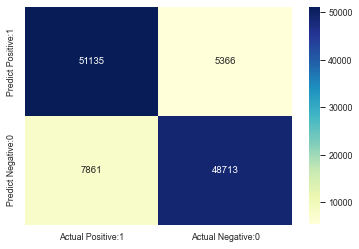

In [69]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positive:1', 'Actual Negative:0'],
                         index = ['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     56501
           1       0.90      0.86      0.88     56574

    accuracy                           0.88    113075
   macro avg       0.88      0.88      0.88    113075
weighted avg       0.88      0.88      0.88    113075



In [71]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

accuracy = (TP+TN) / float(TP+TN+FP+FN)
print('Classification accuracy : {0:0.4f}'.format(accuracy))

class_error = (FP+FN) / float(TP+TN+FP+FN)
print('Classification Error : {0:0.4f}'.format(class_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity or TPR : {0:0.4f}'.format(recall))

Classification accuracy : 0.8830
Classification Error : 0.1170
Precision : 0.9050
Recall or Sensitivity or TPR : 0.8668


In [72]:
# True Positive Rate (TPR)
TPR = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(TPR))

# False Positive Rate (FPR)
FPR = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(FPR))

# Spacificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

True Positive Rate : 0.8668
False Positive Rate : 0.0992
Specificity : 0.9008


## 5. Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the model. 
rf = RandomForestClassifier()

# Training the model. 
rf.fit(X_train, y_train)

# Do prediction. 
y_pred = rf.predict(X_test)

print(eval_classification(rf,y_pred,X_train,y_train, X_test, y_test))
print("="*25)

Accuracy (Test Set): 0.9964
Precision (Test Set): 0.9934
Recall (Test Set): 0.9995
F1-Score (Test Set): 0.9964
AUC: 0.9964
None


Confusion matrix

 [[56127   374]
 [   30 56544]]

True Positives(TP) =  56127

True Negatives(TN) =  56544

False Positives(FP) =  374

False Negatives(FN) =  30


<AxesSubplot:>

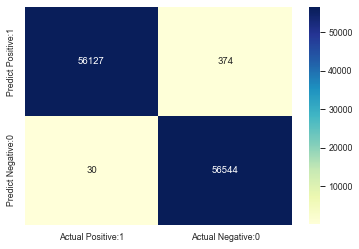

In [74]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positive:1', 'Actual Negative:0'],
                         index = ['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56501
           1       0.99      1.00      1.00     56574

    accuracy                           1.00    113075
   macro avg       1.00      1.00      1.00    113075
weighted avg       1.00      1.00      1.00    113075



In [76]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

accuracy = (TP+TN) / float(TP+TN+FP+FN)
print('Classification accuracy : {0:0.4f}'.format(accuracy))

class_error = (FP+FN) / float(TP+TN+FP+FN)
print('Classification Error : {0:0.4f}'.format(class_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity or TPR : {0:0.4f}'.format(recall))

Classification accuracy : 0.9964
Classification Error : 0.0036
Precision : 0.9934
Recall or Sensitivity or TPR : 0.9995


In [77]:
# True Positive Rate (TPR)
TPR = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(TPR))

# False Positive Rate (FPR)
FPR = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(FPR))

# Spacificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

True Positive Rate : 0.9995
False Positive Rate : 0.0066
Specificity : 0.9934


## 6. XGBoost Classifier

In [78]:
from xgboost import XGBClassifier

# Create an instance of the model. 
xg = XGBClassifier(random_state = 50)

# Training the model. 
xg.fit(X_train, y_train)

# Do prediction. 
y_pred = xg.predict(X_test)

print(eval_classification(xg, y_pred, X_train, y_train, X_test, y_test))
print("="*25)

Accuracy (Test Set): 0.7183
Precision (Test Set): 0.7262
Recall (Test Set): 0.7016
F1-Score (Test Set): 0.7137
AUC: 0.7183
None


Confusion matrix

 [[41534 14967]
 [16883 39691]]

True Positives(TP) =  41534

True Negatives(TN) =  39691

False Positives(FP) =  14967

False Negatives(FN) =  16883


<AxesSubplot:>

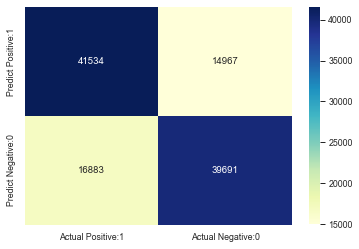

In [79]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positive:1', 'Actual Negative:0'],
                         index = ['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72     56501
           1       0.73      0.70      0.71     56574

    accuracy                           0.72    113075
   macro avg       0.72      0.72      0.72    113075
weighted avg       0.72      0.72      0.72    113075



In [81]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

accuracy = (TP+TN) / float(TP+TN+FP+FN)
print('Classification accuracy : {0:0.4f}'.format(accuracy))

class_error = (FP+FN) / float(TP+TN+FP+FN)
print('Classification Error : {0:0.4f}'.format(class_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity or TPR : {0:0.4f}'.format(recall))

Classification accuracy : 0.7183
Classification Error : 0.2817
Precision : 0.7351
Recall or Sensitivity or TPR : 0.7110


In [82]:
# True Positive Rate (TPR)
TPR = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(TPR))

# False Positive Rate (FPR)
FPR = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(FPR))

# Spacificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

True Positive Rate : 0.7110
False Positive Rate : 0.2738
Specificity : 0.7262


## 7. K-Nearest Neighbor

In [83]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the model. 
knn = KNeighborsClassifier()

# Training the model. 
knn.fit(X_train, y_train)

# Do prediction. 
y_pred = knn.predict(X_test)

print(eval_classification(knn, y_pred, X_train, y_train, X_test, y_test))
print("="*25)

Accuracy (Test Set): 0.8807
Precision (Test Set): 0.8093
Recall (Test Set): 0.9962
F1-Score (Test Set): 0.8931
AUC: 0.8806
None


Confusion matrix

 [[43222 13279]
 [  214 56360]]

True Positives(TP) =  43222

True Negatives(TN) =  56360

False Positives(FP) =  13279

False Negatives(FN) =  214


<AxesSubplot:>

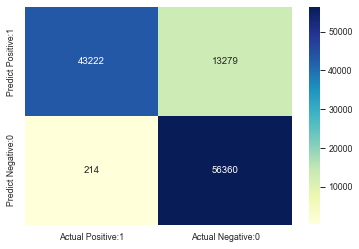

In [84]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positive:1', 'Actual Negative:0'],
                         index = ['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86     56501
           1       0.81      1.00      0.89     56574

    accuracy                           0.88    113075
   macro avg       0.90      0.88      0.88    113075
weighted avg       0.90      0.88      0.88    113075



In [86]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

accuracy = (TP+TN) / float(TP+TN+FP+FN)
print('Classification accuracy : {0:0.4f}'.format(accuracy))

class_error = (FP+FN) / float(TP+TN+FP+FN)
print('Classification Error : {0:0.4f}'.format(class_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity or TPR : {0:0.4f}'.format(recall))

Classification accuracy : 0.8807
Classification Error : 0.1193
Precision : 0.7650
Recall or Sensitivity or TPR : 0.9951


In [87]:
# True Positive Rate (TPR)
TPR = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(TPR))

# False Positive Rate (FPR)
FPR = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(FPR))

# Spacificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

True Positive Rate : 0.9951
False Positive Rate : 0.1907
Specificity : 0.8093


# Model Selection

In [88]:
results = pd.DataFrame([["Logistic Regression", 0.6729, 0.6772, 0.6614, 0.6692, 0.6729],
                        ["AdaBoost Classifier", 0.6767, 0.6881, 0.6472, 0.6670, 0.6767],
                        ["Nearest Centroid", 0.6516, 0.6513, 0.6533, 0.6523, 0.6516],
                        ["Decission Tree", 0.8835, 0.9014, 0.8614, 0.8810, 0.8835],
                        ["Random Forest", 0.9962, 0.9930, 0.9994, 0.9962, 0.9962],
                        ["XGBoost Classifier", 0.7183, 0.7262, 0.7016, 0.7137, 0.7183],
                        ["K-Nearest Neighbor", 0.8807, 0.8093, 0.9962, 0.8931, 0.8806]],
                        columns = ["Models", "Accuracy", "Precision", "Recall", "F1-Score", "AUC"])

results.sort_values(by=['Accuracy'], ascending=False).reset_index(drop=True).style.background_gradient(cmap='Blues')

,Models,Accuracy,Precision,Recall,F1-Score,AUC
0,Random Forest,0.996200,0.993000,0.999400,0.996200,0.996200
1,Decission Tree,0.883500,0.901400,0.861400,0.881000,0.883500
2,K-Nearest Neighbor,0.880700,0.809300,0.996200,0.893100,0.880600
3,XGBoost Classifier,0.718300,0.726200,0.701600,0.713700,0.718300
4,AdaBoost Classifier,0.676700,0.688100,0.647200,0.667000,0.676700
5,Logistic Regression,0.672900,0.677200,0.661400,0.669200,0.672900
6,Nearest Centroid,0.651600,0.651300,0.653300,0.652300,0.651600


The best model that is selected for prediction is the **Random Forest** model with the relatively highest metrics score among the other models.

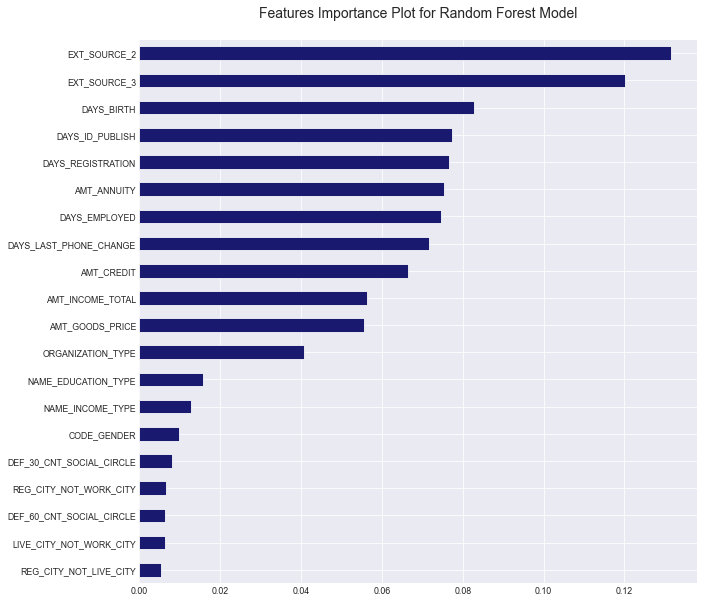

In [89]:
# important features
importances_rf = pd.Series(rf.feature_importances_, index = x_balanced.columns).sort_values(ascending = True)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (10,10))
fig = importances_rf.plot(kind = 'barh', color = 'midnightblue')
plt.title('Features Importance Plot for Random Forest Model\n', fontsize = 14)
plt.show()

fig.figure.tight_layout()

# Prediction

## Import Test Dataset

In [90]:
df_test = pd.read_csv(r"C:\Users\Nicholas Sky\Downloads\application_test.csv", sep=',')
print('This dataset has %d rows dan %d columns.\n' % df_test.shape)
df_test.head()

This dataset has 48744 rows dan 121 columns.



,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

## Data Preprocessing

In [91]:
# Check duplicate
print('The number of duplication is:', df_test.duplicated().sum())

The number of duplication is: 0


,column_name,total_missing,percent_missing
0,SK_ID_CURR,0,0.000000
1,REG_REGION_NOT_WORK_REGION,0,0.000000
2,LIVE_REGION_NOT_WORK_REGION,0,0.000000
3,REG_CITY_NOT_LIVE_CITY,0,0.000000
4,REG_CITY_NOT_WORK_CITY,0,0.000000
5,LIVE_CITY_NOT_WORK_CITY,0,0.000000
6,ORGANIZATION_TYPE,0,0.000000
7,FLAG_DOCUMENT_21,0,0.000000
8,FLAG_DOCUMENT_20,0,0.000000
9,FLAG_DOCUMENT_19,0,0.000000


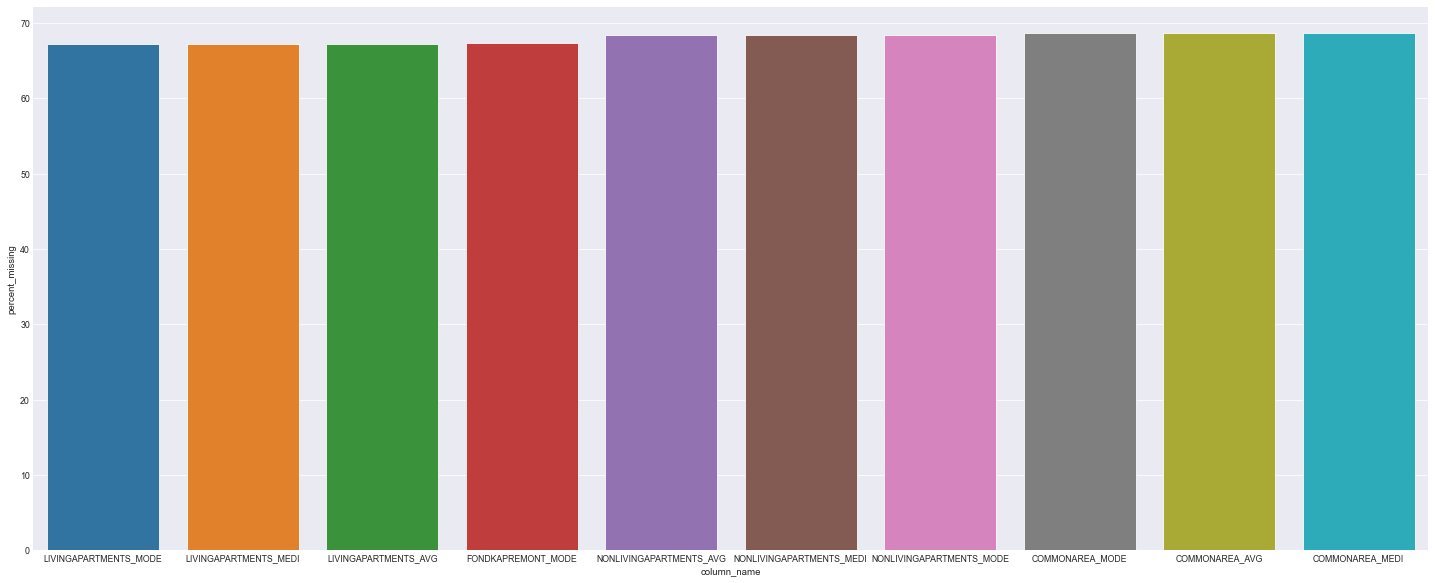

In [92]:
# Check Missing Value

def get_percentMissing(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    tot_missing = df.isnull().sum() 
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'total_missing': tot_missing,
                                     'percent_missing': percent_missing})

    missing_value_df.sort_values('percent_missing',inplace = True)
    a4_dims = (25, 10)
    # df = mylib.load_data()
    fig, ax = plt.subplots(figsize = a4_dims)
    sns.barplot(x = 'column_name', y = 'percent_missing',ax = ax, data = missing_value_df[-10:],)    
    return missing_value_df.reset_index(drop = True)

get_percentMissing(df_test)

In [93]:
# Remove features with total missing values greater than 40%
count_tv = pd.DataFrame(df_test.isnull().sum(), columns = ['Total Null Data']).reset_index()
count_tv['Percentage'] = (count_tv['Total Null Data'] / len(df_test)) * 100
count_tv[count_tv['Percentage'] > 40].sort_values(by = 'Percentage', ascending = False)

missing = list(count_tv[count_tv['Percentage'] > 40]['index'])
df_test.drop(columns = missing, inplace = True)
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.789654,0.159520,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,0.699787,0.610991,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.509677,0.612704,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,0.425687,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 72 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   48744 non-null  int64  
 1   NAME_CONTRACT_TYPE           48744 non-null  object 
 2   CODE_GENDER                  48744 non-null  object 
 3   FLAG_OWN_CAR                 48744 non-null  object 
 4   FLAG_OWN_REALTY              48744 non-null  object 
 5   CNT_CHILDREN                 48744 non-null  int64  
 6   AMT_INCOME_TOTAL             48744 non-null  float64
 7   AMT_CREDIT                   48744 non-null  float64
 8   AMT_ANNUITY                  48720 non-null  float64
 9   AMT_GOODS_PRICE              48744 non-null  float64
 10  NAME_TYPE_SUITE              47833 non-null  object 
 11  NAME_INCOME_TYPE             48744 non-null  object 
 12  NAME_EDUCATION_TYPE          48744 non-null  object 
 13  NAME_FAMILY_STAT

,column_name,total_missing,percent_missing
0,SK_ID_CURR,0,0.0
1,FLAG_DOCUMENT_7,0,0.0
2,FLAG_DOCUMENT_6,0,0.0
3,FLAG_DOCUMENT_5,0,0.0
4,FLAG_DOCUMENT_4,0,0.0
5,FLAG_DOCUMENT_3,0,0.0
6,FLAG_DOCUMENT_2,0,0.0
7,FLAG_DOCUMENT_8,0,0.0
8,DAYS_LAST_PHONE_CHANGE,0,0.0
9,OBS_60_CNT_SOCIAL_CIRCLE,0,0.0


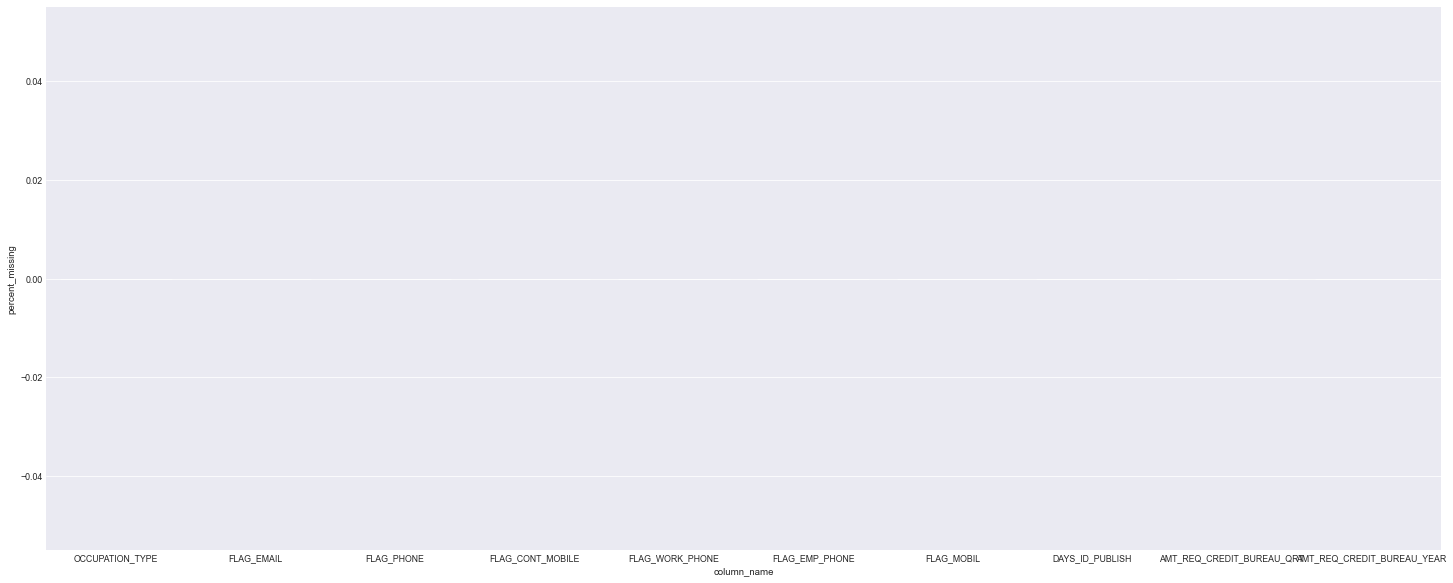

In [95]:
# impute missing values with median because the data is skewed for numerical features
# impute missing values with mode for categorical features

cat_var_test = df_test.select_dtypes(include = ['object']).columns.tolist()
num_var_test = df_test.select_dtypes(exclude = ['object']).columns.tolist()

for column in df_test:
    if df_test[column].isnull().any():
        if(column in cat_var_test):
            df_test[column] = df_test[column].fillna(df_test[column].mode()[0])
        else:
            df_test[column] = df_test[column].fillna(df_test[column].median())

get_percentMissing(df_test)

In [96]:
# One-Hot Encoding
df_test[cat_var_test] = df_test[cat_var_test].apply(LabelEncoder().fit_transform)
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,6,6,1,1,1,0.018850,-19241,-2329,-5170.0,-812,1,1,0,1,0,1,8,2.0,2,2,5,18,0,0,0,0,0,0,28,0.789654,0.159520,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,6,6,4,1,1,0.035792,-18064,-4469,-9118.0,-1623,1,1,0,1,0,0,9,2.0,2,2,0,9,0,0,0,0,0,0,42,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,6,6,1,1,1,0.019101,-20038,-4458,-2175.0,-3503,1,1,0,1,0,0,4,2.0,2,2,1,14,0,0,0,0,0,0,54,0.699787,0.610991,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,6,6,4,1,1,0.026392,-13976,-1866,-2000.0,-4208,1,1,0,1,1,0,14,4.0,2,2,6,11,0,0,0,0,0,0,5,0.509677,0.612704,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,6,6,4,1,1,0.010032,-13040,-2191,-4000.0,-4262,1,1,1,1,0,0,8,3.0,2,2,0,5,0,0,0,0,1,1,5,0.425687,0.519097,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [97]:
# Convert negative value to positive
df_test.iloc[:,16:20] = df_test.iloc[:,16:20].abs()
df_test.iloc[:,45] = df_test.iloc[:,45].abs()

df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,6,6,1,1,1,0.018850,19241,2329,5170.0,812,1,1,0,1,0,1,8,2.0,2,2,5,18,0,0,0,0,0,0,28,0.789654,0.159520,0.0,0.0,0.0,0.0,1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,6,6,4,1,1,0.035792,18064,4469,9118.0,1623,1,1,0,1,0,0,9,2.0,2,2,0,9,0,0,0,0,0,0,42,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,6,6,1,1,1,0.019101,20038,4458,2175.0,3503,1,1,0,1,0,0,4,2.0,2,2,1,14,0,0,0,0,0,0,54,0.699787,0.610991,0.0,0.0,0.0,0.0,856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,6,6,4,1,1,0.026392,13976,1866,2000.0,4208,1,1,0,1,1,0,14,4.0,2,2,6,11,0,0,0,0,0,0,5,0.509677,0.612704,0.0,0.0,0.0,0.0,1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,6,6,4,1,1,0.010032,13040,2191,4000.0,4262,1,1,1,1,0,0,8,3.0,2,2,0,5,0,0,0,0,1,1,5,0.425687,0.519097,0.0,0.0,0.0,0.0,821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [98]:
# Select top 20 best features
test_pred = df_test[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT',
                     'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION',
                     'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY',
                     'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                     'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                     'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]

test_pred.head()

,DAYS_EMPLOYED,AMT_GOODS_PRICE,AMT_CREDIT,DAYS_BIRTH,AMT_INCOME_TOTAL,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,AMT_ANNUITY,ORGANIZATION_TYPE,NAME_INCOME_TYPE,REG_CITY_NOT_WORK_CITY,CODE_GENDER,EXT_SOURCE_2,REG_CITY_NOT_LIVE_CITY,NAME_EDUCATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,DEF_60_CNT_SOCIAL_CIRCLE,LIVE_CITY_NOT_WORK_CITY
0,2329,450000.0,568800.0,19241,135000.0,5170.0,1740.0,812,20560.5,28,6,0,0,0.789654,0,1,0.0,0.159520,0.0,0
1,4469,180000.0,222768.0,18064,99000.0,9118.0,0.0,1623,17370.0,42,6,0,1,0.291656,0,4,0.0,0.432962,0.0,0
2,4458,630000.0,663264.0,20038,202500.0,2175.0,856.0,3503,69777.0,54,6,0,1,0.699787,0,1,0.0,0.610991,0.0,0
3,1866,1575000.0,1575000.0,13976,315000.0,2000.0,1805.0,4208,49018.5,5,6,0,0,0.509677,0,4,0.0,0.612704,0.0,0
4,2191,625500.0,625500.0,13040,180000.0,4000.0,821.0,4262,32067.0,5,6,1,1,0.425687,0,4,0.0,0.519097,0.0,1


In [99]:
# Prediction using Random Forest Model
predict = pd.Series(rf.predict(test_pred), name = "TARGET").astype(int)
predict = pd.concat([df_test['SK_ID_CURR'], predict], axis = 1)
predict.head()

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0


In [100]:
#results.to_csv("predict application.csv", index = False)